# DSI Project 3

# Problem Statement

<font color=greyblack>
Documention classification in the past used to be done manually and requires high labour hour.<br>
As a marketer who is intereted in identify what are the keywords that users in the Reddit community use when discussing on 2 topics: coffee and restaurant so that the keywords can be later used in content creation.<br> 
In this project, We will train a classifier to take in text input and then classify to which group the text belongs to in order to reduce labour hour and increase classification accuracy.<br>

# Table of Content


- [Import Library](#Import-Library)
- [Data Collection](#Data-Collection)
    - [1. Scrap Data from Subreddit:Coffee](#1.-Scrap-Data-from-Subreddit:Coffee)
    - [2.Scrap Data from Subreddit:Restaurant](#2.-Scrap-Data-from-Subreddit:Restaurant)  
- [Import and Read CVS File](#Import-and-Read-CVS-File)
- [Data Cleaning](#Data-Cleaning)
     - [1. Extracting Columns of Interest](#1.-Extracting-Columns-of-Interest)
     - [2. Remove Duplicate Post](#2.-Remove-Duplicate-Post)
     - [3. Filling in Null Value](3.-Filling-in-Null-Value)
- [Train-Test-Split: Training Data (80% for development) and Testing Data (20% for performance evaluation)](#Train-Test-Split:-Training-Data-(80%-for-development)-and-Testing-Data-(20%-for-performance-evaluation))
     - [1. Split coffee_sub dataset- Training Set 80%, Testing Set 20%](#1.-Split-coffee-_-sub-dataset-Training-Set-80%,-Testing-Set-20%)
     - [ 2. Split restaurant_sub dataset- Training Set 80%, Testing Set 20%](#2.-Split-restaurant-_-sub-dataset-Training-Set-80%,-Testing-Set-20%)
     - [3. Traning Set and Testing Set Ready](#3.-Traning-Set-and-Testing-Set-Ready)
     - [4. Map Lable for Target, Subreddit: Coffee-0, Restaurant-1](#4.-Map-Lable-for-Target)
- [EDA](#EDA)
- [Pre-processing](#Pre-processing)
    - [1.Function to tokenize word and remove unwanted element, returning a list of string of words](#1.-Function-to-tokenize-word-and-remove-unwanted-element-,-returning-a-list-of-string-of-words)
    - [2. Lemmatization](#2.-Lemmatization)
    - [3. Stemming](#3-Stemming)
    - [4. WordCloud on Clean Training Selftext](#4.-WordCloud-on-Clean-Training-Selftext)
- [Baseline Accuracy](#Baseline-Accuracy)
- [Create Train Test Split for Training Dataset](#Create-Train-Test-Split-for-Training-Dataset) 
- [DefineTesting Dataset Feature and Target](#DefineTesting-Dataset-Feature-and-Target) 
- [CountVectorizer](#CountVectorizer) 
- [Model](#Model)
    - [Model: CountVectorizer Logistic Regression](#Model-:-CountVectorizer-Logistic-Regression)
    - [Model: CountVectorizer Multinomial Naive Bayes](#Model-:-CountVectorizer-Multinomial-Naive-Bayes)
    - [Pipeline & GridSearch CountVectorizer Logistic Regression](#Pipeline-&-GridSearch-CountVectorizer-Logistic-Regression)
    - [Model 1: CountVectorizer Logistic Regression with Best Parameter](#Model-1-CountVectorizer-Logistic-Regression-with-Best-Parameter)
    - [Pipeline & GridSearch CountVectorizer Multinomial Naive Bayes](#Pipeline-&-GridSearch-CountVectorizer-Multinomial-Naive-Bayes)
    - [Model 2 CountVectorizer Multinomial Naive Bayes with Best Parameter](#Model-2-CountVectorizer-Multinomial-Naive-Bayes-with-Best-Parameter)
- [Using CountVectorizer Multinomial Naive Bayes with Best Parameter to Predict Testing Datasets](#Using-CountVectorizer-Multinomial-Naive-Bayes-with-Best-Parameter-to-Predict-Testing-Datasets)
- [Conclusion & Recommendation](#Conclusion-&-Recommendation) 


        
        
  





# Import Library

In [1]:
# Import Library

import json
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import time
import string
import emoji
import requests
import random

%matplotlib inline

import unicodedata as ud
import unicodedata
from unidecode import unidecode
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction import stop_words
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from bs4 import BeautifulSoup
from cucco import Cucco
from wordcloud import WordCloud,ImageColorGenerator

[*Back to Table of Content^*](#Table-of-Content)

# Data Collection

<font color=greyblack> Data of 2 subreddit: Coffee & Restaurant were scrapped using Reddit API.<br>
After getting our url in json, request is sent to Reddit using a non-deafault value for the key 'User-agent' to prevent Reddit from shutting our script from accessing its API. <br> 
A status code of 200 shows that the request was received and understood ad is being processed.<br>
The Json file received is a nested dictionary, access to key 'data' and then key'children' to get the "content".<br>
As each Reddit request will only return 25 posts, a for loop is used to hit Reddit API repeatedly to collect a minimum of 1000 posts from each subreddit. The for loop will have an empty list created to store Arandom sleep duration is included at the end of loop to give anatural break in between request.<br>
The scraped data is saved in a Pandas Dataframe and exort as csv file. 

### 1. Scrap Data from Subreddit:Coffee

In [ ]:
# This cell is commented off as it runs a long duration to scrap data
# Scrapped data is saved and exported to csv file and will be imported for reading later. 

# posts = []
# after = None
# url = 'https://www.reddit.com/r/Coffee.json'
# 
# for a in range(50):
#     if after == None:
#         current_url = url
#     else:
#         current_url = url + '?after=' + after
#     print(current_url)
#     res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
#     
#     if res.status_code != 200:
#         print('Status error', res.status_code)
#         break
#     
#     current_dict = res.json()
#     current_posts = [p['data'] for p in current_dict['data']['children']]
#     posts.extend(current_posts)
#     after = current_dict['data']['after']
#     
#     # generate a random sleep duration to look more 'natural'
#     sleep_duration = random.randint(2,60)
#     print(sleep_duration)
#     time.sleep(sleep_duration)

In [ ]:
# This cell is commented off as it requires cell above to run together
# Check length of post
# len(posts)

In [ ]:
# This cell is commented off as it requires cell above to run together
# To export scrapped data into a csv file 
# pd.DataFrame(posts).to_csv('coffee.csv', index = False)

### 2.Scrap Data from Subreddit:Restaurant

In [ ]:
# This cell is commented off as it runs a long duration to scrap data
# Scrapped data is saved and exported to csv file and will be imported for reading later. 

# posts= []
# after = None
# url = 'https://www.reddit.com/r/beauty.json'
# 
# for a in range(50):
#     if after == None:
#         current_url = url
#     else:
#         current_url = url + '?after=' + after
#     print(current_url)
#     res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
#     
#     if res.status_code != 200:
#         print('Status error', res.status_code)
#         break
#     
#     current_dict = res.json()
#     current_posts = [p['data'] for p in current_dict['data']['children']]
#     posts.extend(current_posts)
#     after = current_dict['data']['after']
#     
#     # generate a random sleep duration to look more 'natural'
#     sleep_duration = random.randint(2,60)
#     print(sleep_duration)
#     time.sleep(sleep_duration)

In [ ]:
# This cell is commented off as it requires cell above to run together
# Check length of post
# len(posts)

In [ ]:
# This cell is commented off as it requires cell above to run together
# To export scrapped data into a csv file 
# pd.DataFrame(posts).to_csv('beauty.csv', index = False)

[*Back to Table of Content^*](#Table-of-Content)

# Import and Read CVS File

In [2]:
# Read csv file 
coffee_full=pd.read_csv('./datasets/coffee.csv')
restaurant_full=pd.read_csv('./datasets/restaurant.csv')

# Set option to view all columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 8000)

In [3]:
# Check shape of both datasets
print('Shape of coffee_full :',coffee_full.shape)
print('Shape of restaurant_full :',restaurant_full.shape)

Shape of coffee_full : (1248, 99)
Shape of restaurant_full : (1228, 104)


<font color=greyblack>

#### Both subreddit has diffent numbers of rows:<br>
coffee_full & restaurat_full has 1245 and 1228 observations respectively as on 18th October 2019 when data was scrapped.<br>
20% of the 2 data sets will later be splited in two subsets: one for training (or development) and the other one for testing (or for performance evaluation).<br>


#### Both subreddit has diffent numbers of columns:<br>

coffee_full has 99 columns and restaurant_full has 104 columns<br>
column that exists in coffee_full but not in restaurant_full is 'author_cakeday'.<br

columns that exist in restaurnat_full but not in coffee_full are <br>'crosspost_parent','crosspost_parent_list','post_hint','preview','thumbnail_height','thumbnail_width'.<br><br>



In [4]:
# Check info of data
coffee_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 99 columns):
all_awardings                    1248 non-null object
allow_live_comments              1248 non-null bool
approved_at_utc                  0 non-null float64
approved_by                      0 non-null float64
archived                         1248 non-null bool
author                           1248 non-null object
author_cakeday                   1 non-null object
author_flair_background_color    0 non-null float64
author_flair_css_class           0 non-null float64
author_flair_richtext            1243 non-null object
author_flair_template_id         107 non-null object
author_flair_text                126 non-null object
author_flair_text_color          131 non-null object
author_flair_type                1243 non-null object
author_fullname                  1243 non-null object
author_patreon_flair             1243 non-null object
awarders                         1248 non-null 

In [5]:
restaurant_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Columns: 104 entries, all_awardings to wls
dtypes: bool(26), float64(28), int64(10), object(40)
memory usage: 779.6+ KB


<font color=greyblack>List of info for restaurant_full was not printed properly as coffee_full .

In [6]:
# Checking for percentage of null values for each column
coffee_null_df = coffee_full.columns[coffee_full.isnull().any()]
num = coffee_full[coffee_null_df].isnull().sum()
null_list = [round(num/coffee_full.shape[0], 2)]
display(null_list)

[approved_at_utc                  1.00
 approved_by                      1.00
 author_cakeday                   1.00
 author_flair_background_color    1.00
 author_flair_css_class           1.00
 author_flair_richtext            0.00
 author_flair_template_id         0.91
 author_flair_text                0.90
 author_flair_text_color          0.90
 author_flair_type                0.00
 author_fullname                  0.00
 author_patreon_flair             0.00
 banned_at_utc                    1.00
 banned_by                        1.00
 category                         1.00
 content_categories               1.00
 discussion_type                  1.00
 distinguished                    0.98
 likes                            1.00
 link_flair_background_color      1.00
 link_flair_css_class             1.00
 link_flair_text                  1.00
 media                            1.00
 media_metadata                   0.99
 mod_note                         1.00
 mod_reason_by           

<font color=greyblack> coffee_full was found to have 4% of null value for 'selftext' column.   

In [7]:
# Checking for percentage of null values for each column
restaurant_null_df = restaurant_full.columns[restaurant_full.isnull().any()]
num = restaurant_full[restaurant_null_df].isnull().sum()
null_list = [round(num/restaurant_full.shape[0], 2)]
display(null_list)

[approved_at_utc                  1.00
 approved_by                      1.00
 author_flair_background_color    1.00
 author_flair_css_class           1.00
 author_flair_richtext            0.01
 author_flair_template_id         1.00
 author_flair_text                1.00
 author_flair_text_color          0.99
 author_flair_type                0.01
 author_fullname                  0.01
 author_patreon_flair             0.01
 banned_at_utc                    1.00
 banned_by                        1.00
 category                         1.00
 content_categories               1.00
 crosspost_parent                 0.99
 crosspost_parent_list            0.99
 discussion_type                  1.00
 distinguished                    1.00
 likes                            1.00
 link_flair_background_color      1.00
 link_flair_css_class             1.00
 link_flair_text                  1.00
 media                            0.94
 media_metadata                   1.00
 mod_note                

<font color=greyblack> 

restaurant_full was found to have 38% of null value for 'selftext' column.<br>
This is due to user:
1. posting pictures (thumbnail)
2. post only title 
3. Thumnail 'default' without attaching any picture.<br><br>    
    
To overcome this, null value for 'selftext' in both datasets will be replaced by 'title' as 'title' should be able to 'tell' or 'summarize' the context of 'selftext'.

In [8]:
# check top 2 rows of coffee_full
coffee_full.head(2)

all_awardings  allow_live_comments  approved_at_utc  approved_by  archived  \
0            []                False              NaN          NaN     False   
1            []                False              NaN          NaN     False   

            author author_cakeday  author_flair_background_color  \
0  menschmaschine5            NaN                            NaN   
1  menschmaschine5            NaN                            NaN   

   author_flair_css_class author_flair_richtext  \
0                     NaN                    []   
1                     NaN                    []   

               author_flair_template_id author_flair_text  \
0  06217850-b9a8-11e3-9546-12313b0d38eb       Kalita Wave   
1  06217850-b9a8-11e3-9546-12313b0d38eb       Kalita Wave   

  author_flair_text_color author_flair_type author_fullname  \
0                    dark              text        t2_a04m4   
1                    dark              text        t2_a04m4   

  author_patreon_flair awarders  banned_at_utc  banned_by  can_gild  \
0                False       []            NaN        NaN     False   
1                False       []            NaN        NaN     False   

   can_mod_post  category  clicked  content_categories  contest_mode  \
0         False       NaN    False                 NaN         False   
1         False       NaN    False                 NaN         False   

        created   created_utc  discussion_type distinguished       domain  \
0  1.571032e+09  1.571003e+09              NaN     moderator  self.Coffee   
1  1.571097e+09  1.571068e+09              NaN     moderator  self.Coffee   

   downs edited  gilded gildings  hidden  hide_score      id  \
0      0  False       0       {}   False       False  dhh04v   
1      0  False       0       {}   False       False  dhsic9   

   is_crosspostable  is_meta  is_original_content  is_reddit_media_domain  \
0             False    False                False                   False   
1             False    False                False                   False   

   is_robot_indexable  is_self  is_video  likes  link_flair_background_color  \
0                True     True     False    NaN                          NaN   
1                True     True     False    NaN                          NaN   

   link_flair_css_class link_flair_richtext  link_flair_text  \
0                   NaN                  []              NaN   
1                   NaN                  []              NaN   

  link_flair_text_color link_flair_type  locked media media_embed  \
0                  dark            text   False   NaN          {}   
1                  dark            text   False   NaN          {}   

  media_metadata  media_only  mod_note  mod_reason_by  mod_reason_title  \
0            NaN       False       NaN            NaN               NaN   
1            NaN       False       NaN            NaN               NaN   

  mod_reports       name  no_follow  num_comments  num_crossposts  \
0          []  t3_dhh04v      False            13               0   
1          []  t3_dhsic9      False            15               0   

   num_reports  over_18 parent_whitelist_status  \
0          NaN    False                 all_ads   
1          NaN    False                 all_ads   

                                           permalink  pinned  pwls  \
0  /r/Coffee/comments/dhh04v/mod_the_official_dea...   False     6   
1  /r/Coffee/comments/dhsic9/mod_inside_scoop_ask...   False     6   

   quarantine  removal_reason  report_reasons  saved  score secure_media  \
0       False             NaN             NaN  False     60          NaN   
1       False             NaN             NaN  False     16          NaN   

  secure_media_embed                                           selftext  \
0                 {}  Welcome to the /r/Coffee deal and promotional ...   
1                 {}  This is a thread for the enthusiasts of /r/Cof...   

                                       selft

In [9]:
# check top 2 rows of restaurant_full
restaurant_full.head(2)

all_awardings  allow_live_comments  approved_at_utc  approved_by  archived  \
0            []                False              NaN          NaN     False   
1            []                False              NaN          NaN     False   

    author  author_flair_background_color  author_flair_css_class  \
0  Jannetw                            NaN                     NaN   
1    yelpu                            NaN                     NaN   

  author_flair_richtext  author_flair_template_id  author_flair_text  \
0                    []                       NaN                NaN   
1                    []                       NaN                NaN   

  author_flair_text_color author_flair_type author_fullname  \
0                     NaN              text     t2_3z6ar5ym   
1                     NaN              text     t2_4dz9394c   

  author_patreon_flair awarders  banned_at_utc  banned_by  can_gild  \
0                False       []            NaN        NaN     False   
1                False       []            NaN        NaN     False   

   can_mod_post  category  clicked  content_categories  contest_mode  \
0         False       NaN    False                 NaN         False   
1         False       NaN    False                 NaN         False   

        created   created_utc crosspost_parent crosspost_parent_list  \
0  1.571247e+09  1.571219e+09              NaN                   NaN   
1  1.571059e+09  1.571031e+09              NaN                   NaN   

   discussion_type  distinguished       domain  downs edited  gilded gildings  \
0              NaN            NaN  latimes.com      0  False       0       {}   
1              NaN            NaN    i.redd.it      0  False       0       {}   

   hidden  hide_score      id  is_crosspostable  is_meta  is_original_content  \
0   False       False  dimvet             False    False                False   
1   False       False  dhm2xf             False    False                False   

   is_reddit_media_domain  is_robot_indexable  is_self  is_video  likes  \
0                   False                True    False     False    NaN   
1                    True                True    False     False    NaN   

   link_flair_background_color  link_flair_css_class link_flair_richtext  \
0                          NaN                   NaN                  []   
1                          NaN                   NaN                  []   

   link_flair_text link_flair_text_color link_flair_type  locked media  \
0              NaN                  dark            text   False   NaN   
1              NaN                  dark            text   False   NaN   

  media_embed media_metadata  media_only  mod_note  mod_reason_by  \
0          {}            NaN       False       NaN            NaN   
1          {}            NaN       False       NaN            NaN   

   mod_reason_title mod_reports       name  no_follow  num_comments  \
0               NaN          []  t3_dimvet      False             1   
1               NaN          []  t3_dhm2xf      False             1   

   num_crossposts  num_reports  over_18 parent_whitelist_status  \
0               0          NaN    False                 all_ads   
1               0          NaN    False                 all_ads   

                                           permalink  pinned post_hint  \
0  /r/restaurant/comments/dimvet/a_breaking_bad_r...   False      link   
1  /r/restaurant/comments/dhm2xf/doorway_in_one_o...   False     image   

                                             preview  pwls  quarantine  \
0  {'images': [{'source': {'url': 'https://extern...     6       False   
1  {'images': [{'source': {'url': 'https://previe...     6       False   

   removal_reason  report_reasons  saved  score secure_media  \
0             NaN             NaN  False     14          NaN   
1             NaN             NaN  False     23          NaN   

  secure_media_embed selftext selftext_html  send_replies  spoiler  \

In [10]:
# Check description of data
coffee_full.describe()

approved_at_utc  approved_by  author_flair_background_color  \
count              0.0          0.0                            0.0   
mean               NaN          NaN                            NaN   
std                NaN          NaN                            NaN   
min                NaN          NaN                            NaN   
25%                NaN          NaN                            NaN   
50%                NaN          NaN                            NaN   
75%                NaN          NaN                            NaN   
max                NaN          NaN                            NaN   

       author_flair_css_class  banned_at_utc  banned_by  category  \
count                     0.0            0.0        0.0       0.0   
mean                      NaN            NaN        NaN       NaN   
std                       NaN            NaN        NaN       NaN   
min                       NaN            NaN        NaN       NaN   
25%                       NaN            NaN        NaN       NaN   
50%                       NaN            NaN        NaN       NaN   
75%                       NaN            NaN        NaN       NaN   
max                       NaN            NaN        NaN       NaN   

       content_categories       created   created_utc  discussion_type  \
count                 0.0  1.248000e+03  1.248000e+03              0.0   
mean                  NaN  1.570353e+09  1.570324e+09              NaN   
std                   NaN  7.504101e+05  7.504101e+05              NaN   
min                   NaN  1.568870e+09  1.568842e+09              NaN   
25%                   NaN  1.569710e+09  1.569681e+09              NaN   
50%                   NaN  1.570509e+09  1.570480e+09              NaN   
75%                   NaN  1.571010e+09  1.570981e+09              NaN   
max                   NaN  1.571405e+09  1.571376e+09              NaN   

        downs       gilded  likes  link_flair_background_color  \
count  1248.0  1248.000000    0.0                          0.0   
mean      0.0     0.017628    NaN                          NaN   
std       0.0     0.440176    NaN                          NaN   
min       0.0     0.000000    NaN                          NaN   
25%       0.0     0.000000    NaN                          NaN   
50%       0.0     0.000000    NaN                          NaN   
75%       0.0     0.000000    NaN                          NaN   
max       0.0    11.000000    NaN                          NaN   

       link_flair_css_class  link_flair_text  mod_note  mod_reason_by  \
count                   0.0              0.0       0.0            0.0   
mean                    NaN              NaN       NaN            NaN   
std                     NaN              NaN       NaN            NaN   
min                     NaN              NaN       NaN            NaN   
25%                     NaN              NaN       NaN            NaN   
50%                     NaN              NaN       NaN            NaN   
75%                     NaN              NaN       NaN            NaN   
max                     NaN              NaN       NaN            NaN   

       mod_reason_title  num_comments  num_crossposts  num_reports    pwls  \
count               0.0   1248.000000     1248.000000          0.0  1248.0   
mean                NaN     13.049679        0.009615          NaN     6.0   
std                 NaN     23.194117        0.138397          NaN     0.0   
min                 NaN      0.000000        0.000000          NaN     6.0   
25%                 NaN      4.000000        0.000000          NaN     6.0   
50%                 NaN      7.000000        0.000000          NaN     6.0   
75%                 NaN     14.000000        0.000000          NaN     6.0   
max                 NaN    352.000000        3.000000          NaN     6.0   

       removal_reason  report_reasons         score  subreddit_subscribers  \
count             0.0             0.0   1248.000000  

In [11]:
restaurant_full.describe()

approved_at_utc  approved_by  author_flair_background_color  \
count              0.0          0.0                            0.0   
mean               NaN          NaN                            NaN   
std                NaN          NaN                            NaN   
min                NaN          NaN                            NaN   
25%                NaN          NaN                            NaN   
50%                NaN          NaN                            NaN   
75%                NaN          NaN                            NaN   
max                NaN          NaN                            NaN   

       author_flair_css_class  author_flair_template_id  author_flair_text  \
count                     0.0                       0.0                0.0   
mean                      NaN                       NaN                NaN   
std                       NaN                       NaN                NaN   
min                       NaN                       NaN                NaN   
25%                       NaN                       NaN                NaN   
50%                       NaN                       NaN                NaN   
75%                       NaN                       NaN                NaN   
max                       NaN                       NaN                NaN   

       banned_at_utc  banned_by  category  content_categories       created  \
count            0.0        0.0       0.0                 0.0  1.228000e+03   
mean             NaN        NaN       NaN                 NaN  1.557552e+09   
std              NaN        NaN       NaN                 NaN  9.400304e+06   
min              NaN        NaN       NaN                 NaN  1.535588e+09   
25%              NaN        NaN       NaN                 NaN  1.551200e+09   
50%              NaN        NaN       NaN                 NaN  1.559718e+09   
75%              NaN        NaN       NaN                 NaN  1.565156e+09   
max              NaN        NaN       NaN                 NaN  1.571247e+09   

        created_utc  discussion_type  distinguished   downs  gilded  likes  \
count  1.228000e+03              0.0            0.0  1228.0  1228.0    0.0   
mean   1.557523e+09              NaN            NaN     0.0     0.0    NaN   
std    9.400304e+06              NaN            NaN     0.0     0.0    NaN   
min    1.535559e+09              NaN            NaN     0.0     0.0    NaN   
25%    1.551172e+09              NaN            NaN     0.0     0.0    NaN   
50%    1.559689e+09              NaN            NaN     0.0     0.0    NaN   
75%    1.565127e+09              NaN            NaN     0.0     0.0    NaN   
max    1.571219e+09              NaN            NaN     0.0     0.0    NaN   

       link_flair_background_color  link_flair_css_class  link_flair_text  \
count                          0.0                   0.0              0.0   
mean                           NaN                   NaN              NaN   
std                            NaN                   NaN              NaN   
min                            NaN                   NaN              NaN   
25%                            NaN                   NaN              NaN   
50%                            NaN                   NaN              NaN   
75%                            NaN                   NaN              NaN   
max                            NaN                   NaN              NaN   

       mod_note  mod_reason_by  mod_reason_title  num_comments  \
count       0.0            0.0               0.0   1228.000000   
mean        NaN            NaN               NaN      3.754886   
std         NaN            NaN               NaN      4.625081   
min         NaN            NaN               NaN      0.000000   
25%         NaN            NaN               NaN      0.000000   
50%         NaN            NaN               NaN      2.000000   
75%         NaN            NaN               NaN      5.000000   
max         NaN            NaN      

<font color=greyblack> No further data exploratory is done based on the df.describe() as the scope of this project does not involve discovering the Reddit Community intereaction (ie. view count,no of ups, cross post etc.) 
    

[*Back to Table of Content*](#Table-of-Content)

# Data Cleaning
### 1. Extracting Columns of Interest

<font color=greyblack>Despites the huge numbers of columns we scrappd from reddit, we are only interested in the text content in 'selftext' column in order to train our machine in learning and recognizing words to which subreddit do they belongs to.<br>

Hence respective subsets of dataframe with 'selftext','title'and 'subreddit' is created from coffee_full and restaurant_full. 

In [12]:
# Creating subset data for coffee with columns of interest
coffee_sub=coffee_full[['selftext','title','subreddit']]
coffee_sub.head(2)

selftext  \
0  Welcome to the /r/Coffee deal and promotional ...   
1  This is a thread for the enthusiasts of /r/Cof...   

                                          title subreddit  
0                [MOD] The Official Deal Thread    Coffee  
1  [MOD] Inside Scoop - Ask the coffee industry    Coffee

In [15]:
# Creating subset data for restaurant with columns of interest
restaurant_sub=restaurant_full[['selftext','title','subreddit']]
restaurant_sub.head(2)

selftext                                              title   subreddit
0      NaN  A 'Breaking Bad' restaurant opens in West Holl...  restaurant
1      NaN     Doorway in one of the many restaurants in Kyiv  restaurant

### 2. Remove Duplicate Post

#### Remove Duplicate Post: coffee_sub

In [16]:
# Filter for duplicate Post for coffee_sub
dup_rows_coffee= coffee_sub[coffee_sub.duplicated(subset=['selftext','title'])]
dup_rows_coffee

selftext  \
338   This is a thread for the enthusiasts of /r/Cof...   
342   Hello everyone! It's time for the weekly Gear ...   
451   Hey everyone!\n\nWelcome back to the weekly /r...   
463   Welcome to the weekly /r/Coffee question threa...   
587   This is a thread for the enthusiasts of /r/Cof...   
596   Hello everyone! It's time for the weekly Gear ...   
616   Welcome to the /r/Coffee deal and promotional ...   
675   Hey everyone!\n\nWelcome back to the weekly /r...   
686   Welcome to the weekly /r/Coffee question threa...   
806   Hello everyone! It's time for the weekly Gear ...   
811   This is a thread for the enthusiasts of /r/Cof...   
908   Welcome to the weekly /r/Coffee question threa...   
971   Welcome to the /r/Coffee deal and promotional ...   
972   This is a thread for the enthusiasts of /r/Cof...   
973                                                 NaN   
974                                                 NaN   
975   I am usually very bad at keeping myself inform...   
976   Preface, just updated my last few posts with a...   
977   I'm a student living in PG. I'm on keto.\nCan ...   
978   Hello coffee lovers! \n\nI've recently moved i...   
979   I've been using a Capresso Infinity grinder ev...   
981   I've been using a handheld grinder for a few m...   
982   I don't know if it's just caffeine or the flav...   
983   I work at a pretty well established coffee com...   
984   Pretty much the title.  When I got introduced ...   
985   We are trying to get away from our Nespresso M...   
986   Hi, so I used to be a fan of Blue Bottle's New...   
987   So I’ve always loved a good cup of coffee but ...   
988   Hello! I'm new in the world of drip coffee and...   
989   So. Apologies if this has been asked before.\n...   
990   Hi, r/Coffee. As the title says I'm quite an a...   
991   So a co worker brought in some ground fresh co...   
992                                                 NaN   
993   Preface: I *love* coffee, have for a few years...   
994   Ive done some preliminary research and either ...   
995   Hello everyone. I recently have been having an...   
996   Looking at buying this through marketplace. Ch...   
997   Hey everyone!  Every time I go to a new city I...   
998   If I have to drink coffee, I am already sacrif...   
999   Can I run an encore without the gasket until m...   
1000  Are all tampers the same size??? Or I need to ...   
1001  Which one would be best to choose/cost-effecti...   
1002  Hey folks, \n\nPlease forgive me if my questio...   
1003  Advice on buying a used Espresso machine that ...   
1004  Woke up this morning and figured I’d clean my ...   
1005  I've gotten an Aergrind as my first "real" gri...   
1006  Hi,\n\nI’m considering of buying La Pavoni Pro...   
1007  A few weeks ago I bought a [Target brand Cheme...   
1008  Hey coffee bros,\n\nI have an upcoming event t...   
1009  So for a long time I didn't really drink coffe...   
1010  I bought a Breville Barista Express recently, ...   
1011  Hi,\n\nI make my daily coffee using an aeropre...   
1012  So I'm looking to up my espresso game. Going t...   
1013  I have to say, that i was of the camp that goo...   
1014  Do you guys have a favorite temperature to bre...   
1015  Since it’s pumpkin spice season.. I’m pretty s...   
1016  I've recently bought a Gaggia Classic, and as ...   
1017  Just wondering what settings you're finding su...   
1018  What's the difference between making an Americ...   
1019  My wife bought 1 kg of robusta from a shop nea...   
1020  If anyone can point me to a manual where it's ...   
1021  Basically my question is this, if i grind with...   
1022  Made a few mods to my Super Jolly so thought I...   
1023  I know the dripper can do a single cup, but ca...   
1024  Hi,\n\nI'm travelling to Poland next month for...   
1025    \n\nI am new to espresso and I like espresso...   
1026  Hey caffeinated friends,\n\nI just got 2 honki...   
1027  Just tried out a Viet place t

In [17]:
# Check the shape of dup rows
dup_rows_coffee.shape

(288, 3)

<font color=greyblack> Amongst 1245 rows of post in coffee_sub, 288 rows are duplicated rows (23% posts are duplicated)

In [18]:
# df.drop_duplicates(keep=False, inplace=True)
#df.drop_duplicates(subset=['bio', 'center', 'outcome'])
coffee_sub.drop_duplicates(subset=['selftext','title'],keep='first', inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Shape of coffee_sub after remove duplicate posts
coffee_sub.shape

(960, 3)

#### Remove Duplicate Post: restaurant_sub

In [20]:
# Filter for duplicate Post for restaurant_sub
dup_rows_restaurant= restaurant_sub[restaurant_sub.duplicated(subset=['selftext','title'])]
dup_rows_restaurant

selftext  \
464                                                 NaN   
465                                                 NaN   
466     \n\nRefrigeration is one of the most importa...   
467                                                 NaN   
468   I plan on opening a burger restaurant, and I w...   
469   Id like to make my salad at home with that dre...   
470                                                 NaN   
471   I remember starting the industry about 7 years...   
472                                                 NaN   
473   How do you ask a restaurant employee to change...   
474   Nobody:\nAbsolutely nobody:\nMy employee: so t...   
475   Not only homemade food is wasted but also the ...   
476   Hello everyone,\n\nLast week I put in a little...   
477   If a restaurant is overstocked 2-3 cases of br...   
478                                                 NaN   
479   I used to love the chicken cubano sandwich fro...   
480                                                 NaN   
481   A bit of context, I opened a happy inauthentic...   
482                                                 NaN   
483                                                 NaN   
484   So I made a bad review after terrible service ...   
485   Hope someone dined there recently can help me ...   
486   *Code Wing* is a fast-casual restaurant chain ...   
487   So I run a restaurant and right now a big issu...   
488   Hello - I am in HR for a restaurant in a city ...   
489                                                 NaN   
490   We are wanting to make a change to our FOH man...   
491                                                 NaN   
492                                                 NaN   
493   I work for a chain of pubs that serves a lot o...   
494                                                 NaN   
495                                                 NaN   
496   I'm starting a job as a busboy at an upscale r...   
497                                                 NaN   
498   I’m fairly new to managing the food service sc...   
499   I've been in the industry about 7 years now an...   
500                                                 NaN   
501   I work in a restaurant and I usually answer th...   
502                                                 NaN   
503   I notice that many restaurants now almost forc...   
504   Why should people tip in California if the min...   
505   Anyone know of any restaurants in the dc area ...   
506   So. I worked for a nice upscale Chinese restau...   
507   My favorite.  Or was.  Not sure what can repla...   
508   I'm going to New Orleans for a week with my wi...   
509   Hey everyone, I manage a restaurant and we're ...   
510   So I was managing a shift in a small English c...   
511   Hey restaurant owners of Reddit. So I’ve had t...   
512   So my fiancé is a GM of a pretty successful re...   
513   DO NOT ORDER BONELESS WINGS. \n\nThe ones at m...   
514                                                 NaN   
515   We are a craft beer bar and restaurant and usu...   
516   Hey all,\n\nWondering if anyone has any legal ...   
517   Hello Reddit,\n\nI am currently starting to wo...   
518   I am advising my wife to accept Bitcion for he...   
519   I have been an expo at a volume kitchen for th...   
520   I'm currently getting things set up for a tria...   
521              https://www.surveymonkey.com/r/RM793XF   
522                                                 NaN   
523   Pizza Hut is now charging a service fee on all...   
524   Trying to find a way to Combat these people th...   
525   Recently moved to the San Diego area for colle...   
526   My 29yo daughter just moved and is looking for...   
527                                                 NaN   
528                                                 NaN   
529                                                 NaN   
530   Hi! I would love to have A food Truck and mayb...   
531   If your at all interested in 

<font color=greyblack> Amongst 1228 rows of post in restaurant_sub, 764 rows are duplicated rows (62% posts are duplicated)

In [21]:
# Check the shape of dup rows
dup_rows_restaurant.shape

(764, 3)

In [22]:
restaurant_sub.drop_duplicates(subset=['selftext','title'],keep='first', inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
# Shape of restaurant_sub after remove duplicate posts
restaurant_sub.shape

(464, 3)

#### 3. Filling in Null Value

Null value in selftext is fillled with title

In [24]:
# Percentage of Null in coffee_sub selftext column 
coffee_sub_null = coffee_sub.columns[coffee_sub.isnull().any()]
num = coffee_sub[coffee_sub_null].isnull().sum()
null_list = [round(num/coffee_sub.shape[0], 2)]
display(null_list)

[selftext    0.04
 dtype: float64]

In [25]:
# Percentage of Null in restaurant_sub selftext column 
restaurant_sub_null = restaurant_sub.columns[restaurant_sub.isnull().any()]
num = restaurant_sub[restaurant_sub_null].isnull().sum()
null_list = [round(num/restaurant_sub.shape[0], 2)]
display(null_list)

[selftext    0.38
 dtype: float64]

In [26]:
# List down rows with null value for selftext
coffee_sub[coffee_sub['selftext'].isnull()]

selftext                                              title subreddit
2        NaN  Thoughts on this new Binging With Babish "espr...    Coffee
3        NaN                  Different types of coffee caw caw    Coffee
20       NaN  What is the best coffee grinder for 80-100$ US...    Coffee
74       NaN            Update: Nitro Coffee Project (It works)    Coffee
90       NaN  On my way to Belgium (Antwerpen &amp; Brussels...    Coffee
108      NaN  What is the most elegant or artistic way that ...    Coffee
144      NaN          Where to get replacement tube for Gaggia?    Coffee
163      NaN       What's a good place for coffee in Milwaukee?    Coffee
188      NaN  Wheres a good place to get coffee in Minneapol...    Coffee
202      NaN  Heading to Nashville Tennessee soon. Any coffe...    Coffee
231      NaN  Hey lads I’m looking for a way to can coffee b...    Coffee
260      NaN  I’m getting into coffee what coffee machine wo...    Coffee
300      NaN  Why does the Baratza Encore get such bad revie...    Coffee
315      NaN  To Hario Skerton Pro users, how many clicks do...    Coffee
320      NaN                  Best hand grinder for 30 dollars?    Coffee
351      NaN  HELP: Beans into cold water. Left: french roas...    Coffee
360      NaN                        Best coffee in Winnipeg, MB    Coffee
381      NaN  I’m about to buy the Atlas of Coffee by James ...    Coffee
383      NaN      How can I brew coffee without any appliances?    Coffee
429      NaN  My mom worked for an oral surgeon who once qui...    Coffee
464      NaN  What's your preferred Phin grind size and method?    Coffee
472      NaN  Sprudge: Protests Erupt Outside Seattle's Caff...    Coffee
477      NaN  In Shanghai for a few days - Where can I find ...    Coffee
533      NaN  folks who love black coffee: do you like stout...    Coffee
566      NaN  Did Chemex change their design or have I been ...    Coffee
574      NaN  Would it be safe to assume buying green beans ...    Coffee
617      NaN  What are your thoughts on a "seasoned" coffee ...    Coffee
640      NaN  Wilfa Svart pre wsp-1a. Thought I could get my...    Coffee
644      NaN  What coffee is so good you can drink it straig...    Coffee
645      NaN  Knock me out!!! Aergrind instead of Aerspeed (...    Coffee
674      NaN  Does anyone have good recipes / suggestions fo...    Coffee
693      NaN  Inside my bialetti, is this normal oxidisation...    Coffee
697      NaN  Anyone ever tried cantuccini or biscotti with ...    Coffee
712      NaN  "Square Just Increased Their Transaction Rates...    Coffee
728      NaN  What are your thoughts on the new Tetsu Kasuya...    Coffee
762      NaN  Is it safe to use flavoured coffee grounds in ...    Coffee
821      NaN  Wife bought me a Hario DPW-3 What size basket ...    Coffee
847      NaN  Why is almond milk reacting this way to my cof...    Coffee
850      NaN  [Video] James Hoffman &amp; "The World's Large...    Coffee
869      NaN  Does anyone know of great Decaf coffee brand t...    Coffee
921      NaN  If a coffee does not taste bitter at all durin...    Coffee

In [27]:
# Length of null value for selftext
len(coffee_sub[coffee_sub['selftext'].isnull()])

41

In [28]:
# Update selftext null value with title
coffee_sub['selftext']=coffee_sub['selftext'].fillna(value=coffee_sub['title'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
#Check if there's anymore null value in coffee_sub
coffee_sub_null = coffee_sub.columns[coffee_sub.isnull().any()]
num = coffee_sub[coffee_sub_null].isnull().sum()
null_list = [round(num/coffee_sub.shape[0], 2)]
display(null_list)

[Series([], dtype: float64)]

In [30]:
# check if the fill na has been updated correcrly 
coffee_sub[coffee_sub['selftext']==coffee_sub['title']]

selftext  \
2    Thoughts on this new Binging With Babish "espr...   
3                    Different types of coffee caw caw   
20   What is the best coffee grinder for 80-100$ US...   
74             Update: Nitro Coffee Project (It works)   
90   On my way to Belgium (Antwerpen &amp; Brussels...   
108  What is the most elegant or artistic way that ...   
144          Where to get replacement tube for Gaggia?   
163       What's a good place for coffee in Milwaukee?   
188  Wheres a good place to get coffee in Minneapol...   
202  Heading to Nashville Tennessee soon. Any coffe...   
231  Hey lads I’m looking for a way to can coffee b...   
260  I’m getting into coffee what coffee machine wo...   
300  Why does the Baratza Encore get such bad revie...   
315  To Hario Skerton Pro users, how many clicks do...   
320                  Best hand grinder for 30 dollars?   
351  HELP: Beans into cold water. Left: french roas...   
360                        Best coffee in Winnipeg, MB   
381  I’m about to buy the Atlas of Coffee by James ...   
383      How can I brew coffee without any appliances?   
429  My mom worked for an oral surgeon who once qui...   
464  What's your preferred Phin grind size and method?   
472  Sprudge: Protests Erupt Outside Seattle's Caff...   
477  In Shanghai for a few days - Where can I find ...   
533  folks who love black coffee: do you like stout...   
566  Did Chemex change their design or have I been ...   
574  Would it be safe to assume buying green beans ...   
617  What are your thoughts on a "seasoned" coffee ...   
640  Wilfa Svart pre wsp-1a. Thought I could get my...   
644  What coffee is so good you can drink it straig...   
645  Knock me out!!! Aergrind instead of Aerspeed (...   
674  Does anyone have good recipes / suggestions fo...   
693  Inside my bialetti, is this normal oxidisation...   
697  Anyone ever tried cantuccini or biscotti with ...   
712  "Square Just Increased Their Transaction Rates...   
728  What are your thoughts on the new Tetsu Kasuya...   
762  Is it safe to use flavoured coffee grounds in ...   
821  Wife bought me a Hario DPW-3 What size basket ...   
847  Why is almond milk reacting this way to my cof...   
850  [Video] James Hoffman &amp; "The World's Large...   
869  Does anyone know of great Decaf coffee brand t...   
921  If a coffee does not taste bitter at all durin...   

                                                 title subreddit  
2    Thoughts on this new Binging With Babish "espr...    Coffee  
3                    Different types of coffee caw caw    Coffee  
20   What is the best coffee grinder for 80-100$ US...    Coffee  
74             Update: Nitro Coffee Project (It works)    Coffee  
90   On my way to Belgium (Antwerpen &amp; Brussels...    Coffee  
108  What is the most elegant or artistic way that ...    Coffee  
144          Where to get replacement tube for Gaggia?    Coffee  
163       What's a good place for coffee in Milwaukee?    Coffee  
188  Wheres a good place to get coffee in Minneapol...    Coffee  
202  Heading to Nashville Tennessee soon. Any coffe...    Coffee  
231  Hey lads I’m looking for a way to can coffee b...    Coffee  
260  I’m getting into coffee what coffee machine wo...    Coffee  
300  Why does the Baratza Encore get such bad revie...    Coffee  
315  To Hario Skerton Pro users, how many clicks do...    Coffee  
320                  Best hand grinder for 30 dollars?    Coffee  
351  HELP: Beans into cold water. Left: french roas...    Coffee  
360                        Best coffee in Winnipeg, MB    Coffee  
381  I’m about to buy the Atlas of Coffee by James ...    Coffee  
383      How can I brew coffee without any appliances?    Coffee  
429  My mom worked for an oral surgeon who once qui...    Coffee  
464  What's your preferred Phin grind size and method?    Coffee  
472  Sprudge: Protests Erupt Outside Seattle's Caff...    Coffee  
477  In Shanghai for a few days - Where can I find ...    Coffee  
5

In [31]:
# Check the number of 'selftext'=='title'
len(coffee_sub[coffee_sub['selftext']==coffee_sub['title']])

41

In [32]:
# List down rows with null value for selftext
restaurant_sub[restaurant_sub['selftext'].isnull()]

selftext                                              title   subreddit
0        NaN  A 'Breaking Bad' restaurant opens in West Holl...  restaurant
1        NaN     Doorway in one of the many restaurants in Kyiv  restaurant
3        NaN              Awesome dumpling spot in Monrovia, CA  restaurant
6        NaN  This is Cerrone’s stone oven pizza place in Co...  restaurant
8        NaN  Eating at Japan's most popular ramen chain: Ic...  restaurant
14       NaN  6 places in downtown Athens to eat like a loca...  restaurant
16       NaN                         Freddy’s restaurant review  restaurant
18       NaN  How this young girl opened a restaurant alone ...  restaurant
19       NaN  Cooking Acoustic for Good Food and Wine 🍷 The ...  restaurant
25       NaN  I found this at the terminal at the Budapest a...  restaurant
27       NaN  How to choose the best website color schemes f...  restaurant
28       NaN                               So who had the food?  restaurant
30       NaN                The Digitally-Native Restaurant Era  restaurant
31       NaN  A Chef from Guan Fu Szechuan Relates the Cultu...  restaurant
33       NaN                       Restaurant Specials (survey)  restaurant
36       NaN  Why do we need to use blast freezers in kitche...  restaurant
38       NaN  Can restaurants ask for you to sign the bill/r...  restaurant
50       NaN  Eating at a Hooters for Women in Japan - Slute...  restaurant
58       NaN  How long do you hold a table booking for? 15 m...  restaurant
63       NaN                 A fictional resturaunt logo I made  restaurant
64       NaN  What’s your favorite place for fish? I really ...  restaurant
65       NaN  Bartenders, how many of you feel a personal ob...  restaurant
68       NaN              i dont care if you leave a bad review  restaurant
70       NaN  What are the chances of being shaken down for ...  restaurant
74       NaN  What’s the ideal amount of entrees and apps to...  restaurant
75       NaN  What do u think of my New restaurant’s logo ? ...  restaurant
78       NaN      Anyone have feedback on opentable promotions?  restaurant
79       NaN                        How to make THEIR SALSA!???  restaurant
80       NaN  Last week I dined on a bus! Bustronome combine...  restaurant
85       NaN   France: waiter shot dead for a sandwich in Paris  restaurant
89       NaN  "Foreign Muck", a new restaurant in Cornwall, ...  restaurant
90       NaN  Where can I find these bowls online at a good ...  restaurant
95       NaN  A woman named Carol posted a complaint about b...  restaurant
97       NaN  Restaurant and Bar owners! Yelp and Grubhub mi...  restaurant
98       NaN        Found in Malgudi's Donne Biryani, Bangalore  restaurant
99       NaN  Launched a food &amp; business navigator for t...  restaurant
101      NaN  I work in an indian restaurant in a big ski re...  restaurant
104      NaN  I would like to organized a dinner gathering w...  restaurant
105      NaN  With most orders being placed through food del...  restaurant
109      NaN  Does the restaurant where you work roll silver...  restaurant
110      NaN  Does anyone have experience using EZCATER? Has...  restaurant
112      NaN  Brunch Chronicles~ Passion The Restaurant Ches...  restaurant
115      NaN            Found deep in the mountains of Georgia.  restaurant
117      NaN         Improved change calculator app for Android  restaurant
119      NaN  Is there any app allowing to understand if a r...  restaurant
120      NaN  Is there any app allowing to know if a restaur...  restaurant
121      NaN  What Are The 7 Tips to Pass Restaurant Health ...  restaurant
122      NaN  How Technology is Changing the Restaurant Indu...  restaurant
123      NaN           What Customers Look for in a Restaurant?  restaurant
124      NaN  What Are The Important Restaurant Facts You Sh...  restaurant
127      NaN  Was tired of waiting for a menu during peak ho...  restaurant
131      NaN  Tipping question: so when I get a rece

In [33]:
# Length of null value for selftext
len(restaurant_sub[restaurant_sub['selftext'].isnull()])

176

In [34]:
# Update selftext null value with title
restaurant_sub['selftext']=restaurant_sub['selftext'].fillna(value=restaurant_sub['title'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
#Check if there's anymore null value in restaurant_sub
restaurant_sub_null = restaurant_sub.columns[restaurant_sub.isnull().any()]
num = restaurant_sub[restaurant_sub_null].isnull().sum()
null_list = [round(num/restaurant_sub.shape[0], 2)]
display(null_list)

[Series([], dtype: float64)]

In [36]:
# check if the fill na has been updated correcrly 
restaurant_sub[restaurant_sub['selftext']==restaurant_sub['title']]

selftext  \
0    A 'Breaking Bad' restaurant opens in West Holl...   
1       Doorway in one of the many restaurants in Kyiv   
3                Awesome dumpling spot in Monrovia, CA   
6    This is Cerrone’s stone oven pizza place in Co...   
8    Eating at Japan's most popular ramen chain: Ic...   
14   6 places in downtown Athens to eat like a loca...   
16                          Freddy’s restaurant review   
18   How this young girl opened a restaurant alone ...   
19   Cooking Acoustic for Good Food and Wine 🍷 The ...   
25   I found this at the terminal at the Budapest a...   
27   How to choose the best website color schemes f...   
28                                So who had the food?   
30                 The Digitally-Native Restaurant Era   
31   A Chef from Guan Fu Szechuan Relates the Cultu...   
33                        Restaurant Specials (survey)   
36   Why do we need to use blast freezers in kitche...   
38   Can restaurants ask for you to sign the bill/r...   
50   Eating at a Hooters for Women in Japan - Slute...   
58   How long do you hold a table booking for? 15 m...   
63                  A fictional resturaunt logo I made   
64   What’s your favorite place for fish? I really ...   
65   Bartenders, how many of you feel a personal ob...   
68               i dont care if you leave a bad review   
70   What are the chances of being shaken down for ...   
74   What’s the ideal amount of entrees and apps to...   
75   What do u think of my New restaurant’s logo ? ...   
78       Anyone have feedback on opentable promotions?   
79                         How to make THEIR SALSA!???   
80   Last week I dined on a bus! Bustronome combine...   
85    France: waiter shot dead for a sandwich in Paris   
89   "Foreign Muck", a new restaurant in Cornwall, ...   
90   Where can I find these bowls online at a good ...   
95   A woman named Carol posted a complaint about b...   
97   Restaurant and Bar owners! Yelp and Grubhub mi...   
98         Found in Malgudi's Donne Biryani, Bangalore   
99   Launched a food &amp; business navigator for t...   
101  I work in an indian restaurant in a big ski re...   
104  I would like to organized a dinner gathering w...   
105  With most orders being placed through food del...   
109  Does the restaurant where you work roll silver...   
110  Does anyone have experience using EZCATER? Has...   
112  Brunch Chronicles~ Passion The Restaurant Ches...   
115            Found deep in the mountains of Georgia.   
117         Improved change calculator app for Android   
119  Is there any app allowing to understand if a r...   
120  Is there any app allowing to know if a restaur...   
121  What Are The 7 Tips to Pass Restaurant Health ...   
122  How Technology is Changing the Restaurant Indu...   
123           What Customers Look for in a Restaurant?   
124  What Are The Important Restaurant Facts You Sh...   
127  Was tired of waiting for a menu during peak ho...   
131  Tipping question: so when I get a receipt and ...   
132  Will the town give you a wine/beer permit if y...   
133  Do You Know How Beer Is Brewed in Bankstown Br...   
134                      The Racist History of Tipping   
135  New Podcast Episode on Parenthood in the Resta...   
136  Carthay Circle at Disney's California Adventur...   
138  [I ate]Dare to Try The Black Pizza | Valid Eve...   
155  Hi minimum wage increase affects tipped Full S...   
156  Asking Veteran Taiwanese Food Vendors for Busi...   
162  Recommendation: Vito’s Kitchen in Springfield,...   
165  [New Study] 1,900+ Restaurant Staff Surveyed o...   
166  Top 10 Restaurants In The World ranked by gour...   
168  How Can You Use Your Instagram Account For Res...   
169  Basic Fryer Pilot Light isn’t Lighting Up, How...   
171  What Are The Other Ways to Help Your Restauran...   
172  How Can You Use Social Media For Your Restaura...   
174  For what reason can a restaurant refuse servic...   
175      What annoys you about eating at a r

In [37]:
# Check the number of 'selftext'=='title'
len(restaurant_sub[restaurant_sub['selftext']==restaurant_sub['title']])

176

[*Back to Table of Content^*](#Table-of-Content)

### Train-Test-Split: Training Data (80% for development) and Testing Data (20% for performance evaluation)

 <font color=greyblack>

coffee_sub and restaurant_sub datasets were respectively splited into Training Set (for model development) and Testing Set( for performance valuation).<br>

Each Testing set is set to comprise 20% of from respective subreddit ( coffee_sub and restaurant_sub) by using train_test-split

#### 1. Split coffee_sub dataset- Training Set 80%, Testing Set 20%

In [38]:
# Create train_test_split for coffee_sub
X_coffee_training, X_coffee_testing, y_coffee_training, y_coffee_testing = train_test_split(coffee_sub[['selftext','title']],
                                                               coffee_sub['subreddit'],
                                                               test_size = 0.20,
                                                               random_state = 42)

In [39]:
# Check X_coffee_training head
X_coffee_training.head(2)

selftext  \
302  My time in the Navy brought my coffee obsessio...   
471  I have read lost of posts here that say you ne...   

                                      title  
302     Nitro cold brew.. or just cold brew  
471  Espresso quality for milk-based drinks

In [40]:
# Check X_coffee_testing head
X_coffee_testing.head(2)

selftext  \
847  Why is almond milk reacting this way to my cof...   
481  Hi guys,\n\nI really enjoy drinking (a lot) of...   

                                                 title  
847  Why is almond milk reacting this way to my cof...  
481                          Roast your coffee at home

In [41]:
# make y_coffee_train into a df
y_coffee_training=pd.DataFrame(y_coffee_training)
y_coffee_training.head(2)

subreddit
302    Coffee
471    Coffee

In [42]:
# make y_coffee_testing into a df
y_coffee_testing=pd.DataFrame(y_coffee_testing)
y_coffee_testing.head(2)

subreddit
847    Coffee
481    Coffee

In [43]:
# Create coffee_training_df combining X_coffee_training & y_coffee_training
coffee_training_df=pd.concat([X_coffee_training,y_coffee_training],axis=1,sort=True)
coffee_training_df.head(2)

selftext  \
0  Welcome to the /r/Coffee deal and promotional ...   
1  This is a thread for the enthusiasts of /r/Cof...   

                                          title subreddit  
0                [MOD] The Official Deal Thread    Coffee  
1  [MOD] Inside Scoop - Ask the coffee industry    Coffee

In [44]:
# Create coffee_testing_df combining X_coffee_testing & y_coffee_testing
coffee_testing_df=pd.concat([X_coffee_testing,y_coffee_testing],axis=1,sort=True)
coffee_testing_df.head(2)

selftext  \
23  Hello everyone. I recently have been having an...   
30  Hey folks, \n\nPlease forgive me if my questio...   

                          title subreddit  
23    Pour over taking too long    Coffee  
30  How should I clean my Moka?    Coffee

In [45]:
print('coffee_training_df Shape: ',coffee_training_df.shape)
print('coffee_testing_df Shape: ',coffee_testing_df.shape)

coffee_training_df Shape:  (768, 3)
coffee_testing_df Shape:  (192, 3)


#### 2. Split restaurant_sub dataset- Training Set 80%, Testing Set 20%

In [46]:
# Create train_test_split for restaurant_sub
X_restaurant_training, X_restaurant_testing, y_restaurant_training, y_restaurant_testing = train_test_split(restaurant_sub[['selftext','title']],
                                                               restaurant_sub['subreddit'],
                                                               test_size = 0.20,
                                                               random_state = 42)

In [47]:
# Check X_restaurant_training head
X_restaurant_training.head(2)

selftext  \
424  Expanded the dining room last night, pretty fu...   
113  I worked as a host at a restaurant over the we...   

                                                 title  
424  Expanded the dining room last night, pretty fu...  
113               What a dumb thing to complain about!

In [48]:
# Check X_restaurant_testing head
X_restaurant_testing.head(2)

selftext  \
9   How do you ask a restaurant employee to change...   
30                The Digitally-Native Restaurant Era   

                                  title  
9         Sorry but change your gloves.  
30  The Digitally-Native Restaurant Era

In [49]:
# make y_restaurant_training into a df
y_restaurant_training=pd.DataFrame(y_restaurant_training)
y_restaurant_training.head(2)

subreddit
424  restaurant
113  restaurant

In [50]:
# make y_restaurant_testing into a df
y_restaurant_testing=pd.DataFrame(y_restaurant_testing)
y_restaurant_testing.head(2)

subreddit
9   restaurant
30  restaurant

In [51]:
# Create restaurant_training_df combining X_restaurant_training & y_restaurant_training
restaurant_training_df=pd.concat([X_restaurant_training,y_restaurant_training],axis=1,sort=True)
restaurant_training_df.head(2)

selftext  \
1     Doorway in one of the many restaurants in Kyiv   
2    \n\nRefrigeration is one of the most importa...   

                                               title   subreddit  
1     Doorway in one of the many restaurants in Kyiv  restaurant  
2  Is There An Ideal Product Core Temperature for...  restaurant

In [52]:
# Create restaurant_testing_df combining X_restaurant_testing & y_restaurant_testing
restaurant_testing_df=pd.concat([X_restaurant_testing,y_restaurant_testing],axis=1,sort=True)
restaurant_testing_df.head(2)

selftext  \
0  A 'Breaking Bad' restaurant opens in West Holl...   
9  How do you ask a restaurant employee to change...   

                                               title   subreddit  
0  A 'Breaking Bad' restaurant opens in West Holl...  restaurant  
9                      Sorry but change your gloves.  restaurant

In [53]:
print('restaurant_training_df Shape: ',restaurant_training_df.shape)
print('restaurant_testing_df Shape: ',restaurant_testing_df.shape)

restaurant_training_df Shape:  (371, 3)
restaurant_testing_df Shape:  (93, 3)


# 3. Traning Set and Testing Set Ready

In [54]:
# Create a training_df which comprise of coffee_training_df and restaurant_training_df

training_df=pd.concat([coffee_training_df,restaurant_training_df],axis=0,ignore_index='True',sort=True)
training_df.head(2)

selftext subreddit  \
0  Welcome to the /r/Coffee deal and promotional ...    Coffee   
1  This is a thread for the enthusiasts of /r/Cof...    Coffee   

                                          title  
0                [MOD] The Official Deal Thread  
1  [MOD] Inside Scoop - Ask the coffee industry

In [55]:
# Create a testing_df which comprise of coffee_testing_df and restaurant_testing_df

testing_df=pd.concat([coffee_testing_df,restaurant_testing_df],axis=0,ignore_index='True',sort=True)
testing_df.head(2)

selftext subreddit  \
0  Hello everyone. I recently have been having an...    Coffee   
1  Hey folks, \n\nPlease forgive me if my questio...    Coffee   

                         title  
0    Pour over taking too long  
1  How should I clean my Moka?

# 4. Map Lable for Target

In [56]:
# Map subreddit to binary
# map coffee=0, restaurant =1
training_df['subreddit'] = training_df['subreddit'].map({'Coffee':0,'restaurant':1})
testing_df['subreddit'] = testing_df['subreddit'].map({'Coffee':0,'restaurant':1})

In [57]:
training_df.head(2)

selftext  subreddit  \
0  Welcome to the /r/Coffee deal and promotional ...          0   
1  This is a thread for the enthusiasts of /r/Cof...          0   

                                          title  
0                [MOD] The Official Deal Thread  
1  [MOD] Inside Scoop - Ask the coffee industry

In [58]:
training_df.tail(2)

selftext  subreddit  \
1137  Slideshow: The 10 Most Expensive Restaurants I...          1   
1138  What it really takes to turn a failing restaur...          1   

                                                  title  
1137  Slideshow: The 10 Most Expensive Restaurants I...  
1138  What it really takes to turn a failing restaur...

In [59]:
testing_df.head(2)

selftext  subreddit  \
0  Hello everyone. I recently have been having an...          0   
1  Hey folks, \n\nPlease forgive me if my questio...          0   

                         title  
0    Pour over taking too long  
1  How should I clean my Moka?

In [60]:
testing_df.tail(2)

selftext  subreddit  \
283  What do you do with the meat at the end of the...          1   
284                           AWESOME DRIVE-THRU DINER          1   

                           title  
283  ? For vertical rotisserie’s  
284     AWESOME DRIVE-THRU DINER

[*Back to Table of Content^*](#Table-of-Content)

# EDA

 <font color=greyblack>Here we can take a look at what is the length of title and length of selftext for both subreddit respectively 

In [61]:
# create column for selftext _len
training_df['selftext_len']=training_df['selftext'].apply(len)
testing_df['selftext_len']=testing_df['selftext'].apply(len)

In [62]:
# create column for title _len
training_df['title_len']=training_df['title'].apply(len)
testing_df['title_len']=testing_df['title'].apply(len)

In [63]:
training_df.head(2)

selftext  subreddit  \
0  Welcome to the /r/Coffee deal and promotional ...          0   
1  This is a thread for the enthusiasts of /r/Cof...          0   

                                          title  selftext_len  title_len  
0                [MOD] The Official Deal Thread          2300         30  
1  [MOD] Inside Scoop - Ask the coffee industry          1310         44

In [64]:
testing_df.head(2)

selftext  subreddit  \
0  Hello everyone. I recently have been having an...          0   
1  Hey folks, \n\nPlease forgive me if my questio...          0   

                         title  selftext_len  title_len  
0    Pour over taking too long           388         25  
1  How should I clean my Moka?           526         27

In [65]:
print('training_df shape: ',training_df.shape)
print('testing_df shape: ',testing_df.shape)

training_df shape:  (1139, 5)
testing_df shape:  (285, 5)


In [66]:
training_df.groupby('subreddit').describe()

selftext_len                                                      \
                 count        mean         std   min     25%    50%    75%   
subreddit                                                                    
0                768.0  553.766927  717.147343  12.0  224.75  396.5  637.5   
1                371.0  369.469003  485.365603  11.0   75.00  214.0  471.5   

                  title_len                                               \
              max     count       mean        std  min   25%   50%   75%   
subreddit                                                                  
0          9553.0     768.0  45.352865  25.775568  3.0  29.0  39.0  56.0   
1          3765.0     371.0  60.191375  48.777637  7.0  30.0  50.0  69.5   

                  
             max  
subreddit         
0          198.0  
1          304.0

In [67]:
testing_df.groupby('subreddit').describe()

selftext_len                                                      \
                 count        mean         std   min    25%    50%     75%   
subreddit                                                                    
0                192.0  465.218750  363.257822  50.0  238.0  352.5  566.25   
1                 93.0  450.064516  962.797315   9.0   63.0  153.0  408.00   

                  title_len                                                \
              max     count       mean        std  min   25%   50%    75%   
subreddit                                                                   
0          2351.0     192.0  45.796875  30.544198  9.0  29.0  40.0  55.25   
1          7452.0      93.0  58.838710  45.550805  6.0  28.0  51.0  70.00   

                  
             max  
subreddit         
0          296.0  
1          253.0

In [ ]:
sns.set_style('white')

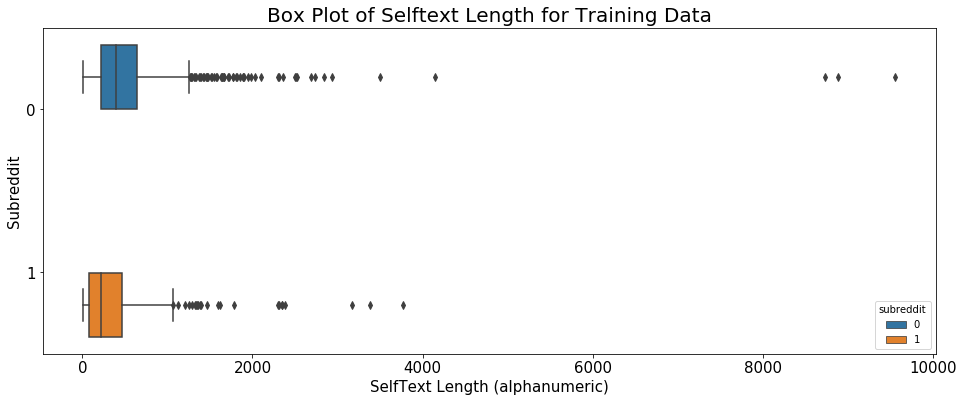

In [74]:
# Plot a Box Plot of Selftext Length for Training Data
fix, ax = plt.subplots(figsize=(16,6))
ax= sns.boxplot(y= 'subreddit',x='selftext_len',data=training_df,orient='h',hue='subreddit')
ax.set_title('Box Plot of Selftext Length for Training Data',fontsize=20)
ax.set_xlabel("SelfText Length (alphanumeric)",fontsize=15)
ax.set_ylabel("Subreddit",fontsize=15)
ax.tick_params(labelsize=15)

<font color=greyblack> 
Selftext length for subreddit coffee is generally longer than subreddit restaurant, having 3 distinct outliers

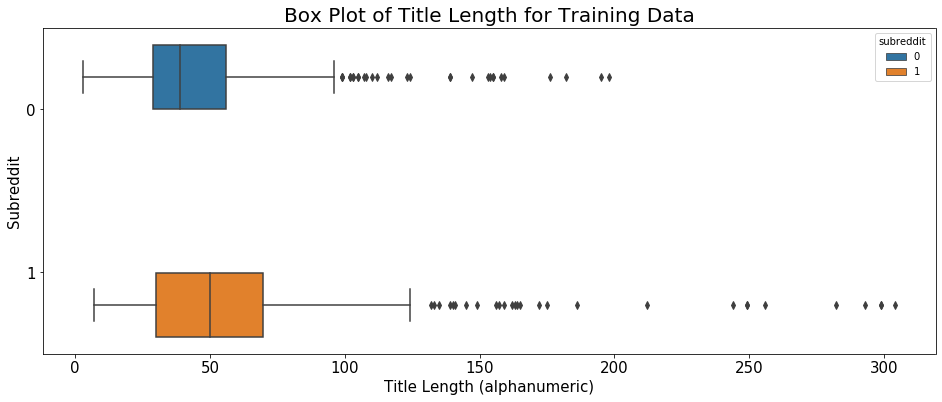

In [75]:
# Plot a Box Plot of Title Length for Training Data
fix, ax = plt.subplots(figsize=(16,6))
ax= sns.boxplot(y= 'subreddit',x='title_len',data=training_df,orient='h',hue='subreddit')
ax.set_title('Box Plot of Title Length for Training Data',fontsize=20)
ax.set_xlabel("Title Length (alphanumeric)",fontsize=15)
ax.set_ylabel("Subreddit",fontsize=15)
ax.tick_params(labelsize=15)

<font color=greyblack> 
Contrarily, title length for subreddit restaurant is generally longer than subreddit coffee, having outliers above 300 alphanumeric.

[*Back to Table of Content^*](#Table-of-Content)

# Pre-processing

<font color=greyblack> 
During pre-processing, sentences are tokenized into lowercase words, removing unwated elements like html, http, punctuations, stopwords and emoji.<br>

We use 3 ways to tokenize word:<br>
1. Using a function to tokenize words and clean unwanted element.
2. Lemmatization to shorten word in attempt to return their lemma, or the base/dictionary form of a word.
3. Stemming to return a base form of the word and is cruder than using lemmatization.

In [111]:
# Randomly pick one selftext from train_df to observed what wordings pattern (ie. \n,) in 'selftext'
mystring=training_df['selftext'][0]
mystring

"Welcome to the /r/Coffee deal and promotional thread! In this biweekly thread, industry folk can post upcoming deals or other promotions their companies are holding, or promote new products to /r/Coffee subscribers! Come check out some of the roasters and other coffee-related businesses that Redditors work for!\n\nThere are a few rules for businesses posting promotional material:\n\n- You need to be active in /r/Coffee in a non-self-promotional context to participate in this thread. If it seems you are only here to promote your business in this thread, your submissions will be removed. Build up some /r/Coffee karma first. The Official Noob-Tastic Question Fest weekly thread, posted every Friday, would be a good place to start, and check out what is on the Front Page and jump in on some discussions. Please maintain a high ratio of general /r/Coffee participation to posts in this thread.\n\n- If you are posting in this thread representing a business, please make sure to request your ind

In [112]:
# 1. remove html

# Initialize the BeautifulSoup object      
bfsoup= BeautifulSoup(mystring)
cleared_html=bfsoup.get_text()
cleared_html

"Welcome to the /r/Coffee deal and promotional thread! In this biweekly thread, industry folk can post upcoming deals or other promotions their companies are holding, or promote new products to /r/Coffee subscribers! Come check out some of the roasters and other coffee-related businesses that Redditors work for!\n\nThere are a few rules for businesses posting promotional material:\n\n- You need to be active in /r/Coffee in a non-self-promotional context to participate in this thread. If it seems you are only here to promote your business in this thread, your submissions will be removed. Build up some /r/Coffee karma first. The Official Noob-Tastic Question Fest weekly thread, posted every Friday, would be a good place to start, and check out what is on the Front Page and jump in on some discussions. Please maintain a high ratio of general /r/Coffee participation to posts in this thread.\n\n- If you are posting in this thread representing a business, please make sure to request your ind

In [113]:
# 2 clear http
cleared_http = re.sub(r"http\S+'", '',cleared_html)
cleared_http

"Welcome to the /r/Coffee deal and promotional thread! In this biweekly thread, industry folk can post upcoming deals or other promotions their companies are holding, or promote new products to /r/Coffee subscribers! Come check out some of the roasters and other coffee-related businesses that Redditors work for!\n\nThere are a few rules for businesses posting promotional material:\n\n- You need to be active in /r/Coffee in a non-self-promotional context to participate in this thread. If it seems you are only here to promote your business in this thread, your submissions will be removed. Build up some /r/Coffee karma first. The Official Noob-Tastic Question Fest weekly thread, posted every Friday, would be a good place to start, and check out what is on the Front Page and jump in on some discussions. Please maintain a high ratio of general /r/Coffee participation to posts in this thread.\n\n- If you are posting in this thread representing a business, please make sure to request your ind

In [114]:
# 3. Clear www
cleared_www= re.sub(r"www\S+'", '',cleared_http)
cleared_www

"Welcome to the /r/Coffee deal and promotional thread! In this biweekly thread, industry folk can post upcoming deals or other promotions their companies are holding, or promote new products to /r/Coffee subscribers! Come check out some of the roasters and other coffee-related businesses that Redditors work for!\n\nThere are a few rules for businesses posting promotional material:\n\n- You need to be active in /r/Coffee in a non-self-promotional context to participate in this thread. If it seems you are only here to promote your business in this thread, your submissions will be removed. Build up some /r/Coffee karma first. The Official Noob-Tastic Question Fest weekly thread, posted every Friday, would be a good place to start, and check out what is on the Front Page and jump in on some discussions. Please maintain a high ratio of general /r/Coffee participation to posts in this thread.\n\n- If you are posting in this thread representing a business, please make sure to request your ind

In [115]:
# 4. Clear Regex
cleaned= re.sub(r'/r/|“|”|\n|&lt;|&gt;|/|-', " ",cleared_http)
cleaned

"Welcome to the  Coffee deal and promotional thread! In this biweekly thread, industry folk can post upcoming deals or other promotions their companies are holding, or promote new products to  Coffee subscribers! Come check out some of the roasters and other coffee related businesses that Redditors work for!  There are a few rules for businesses posting promotional material:    You need to be active in  Coffee in a non self promotional context to participate in this thread. If it seems you are only here to promote your business in this thread, your submissions will be removed. Build up some  Coffee karma first. The Official Noob Tastic Question Fest weekly thread, posted every Friday, would be a good place to start, and check out what is on the Front Page and jump in on some discussions. Please maintain a high ratio of general  Coffee participation to posts in this thread.    If you are posting in this thread representing a business, please make sure to request your industry flair from

In [116]:
# 5. Clear punctuation
nopunc=[c for c in cleaned if c not in string.punctuation]
nopunc

['W',
 'e',
 'l',
 'c',
 'o',
 'm',
 'e',
 ' ',
 't',
 'o',
 ' ',
 't',
 'h',
 'e',
 ' ',
 ' ',
 'C',
 'o',
 'f',
 'f',
 'e',
 'e',
 ' ',
 'd',
 'e',
 'a',
 'l',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'p',
 'r',
 'o',
 'm',
 'o',
 't',
 'i',
 'o',
 'n',
 'a',
 'l',
 ' ',
 't',
 'h',
 'r',
 'e',
 'a',
 'd',
 ' ',
 'I',
 'n',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'b',
 'i',
 'w',
 'e',
 'e',
 'k',
 'l',
 'y',
 ' ',
 't',
 'h',
 'r',
 'e',
 'a',
 'd',
 ' ',
 'i',
 'n',
 'd',
 'u',
 's',
 't',
 'r',
 'y',
 ' ',
 'f',
 'o',
 'l',
 'k',
 ' ',
 'c',
 'a',
 'n',
 ' ',
 'p',
 'o',
 's',
 't',
 ' ',
 'u',
 'p',
 'c',
 'o',
 'm',
 'i',
 'n',
 'g',
 ' ',
 'd',
 'e',
 'a',
 'l',
 's',
 ' ',
 'o',
 'r',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'p',
 'r',
 'o',
 'm',
 'o',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 't',
 'h',
 'e',
 'i',
 'r',
 ' ',
 'c',
 'o',
 'm',
 'p',
 'a',
 'n',
 'i',
 'e',
 's',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'h',
 'o',
 'l',
 'd',
 'i',
 'n',
 'g',
 ' ',
 'o',
 'r',
 ' ',
 'p',
 'r',
 'o'

In [117]:
# 6. join char to words and change all to lowercase
nopunc=''.join(nopunc).lower() 
nopunc

'welcome to the  coffee deal and promotional thread in this biweekly thread industry folk can post upcoming deals or other promotions their companies are holding or promote new products to  coffee subscribers come check out some of the roasters and other coffee related businesses that redditors work for  there are a few rules for businesses posting promotional material    you need to be active in  coffee in a non self promotional context to participate in this thread if it seems you are only here to promote your business in this thread your submissions will be removed build up some  coffee karma first the official noob tastic question fest weekly thread posted every friday would be a good place to start and check out what is on the front page and jump in on some discussions please maintain a high ratio of general  coffee participation to posts in this thread    if you are posting in this thread representing a business please make sure to request your industry flair from the mods before

In [84]:
# 7. Tokenize & Remove stopwords
nostopword=[word for word in nopunc.split() if word.lower()not in stopwords.words('english')]
nostopword

['welcome',
 'coffee',
 'deal',
 'promotional',
 'thread',
 'biweekly',
 'thread',
 'industry',
 'folk',
 'post',
 'upcoming',
 'deals',
 'promotions',
 'companies',
 'holding',
 'promote',
 'new',
 'products',
 'coffee',
 'subscribers',
 'come',
 'check',
 'roasters',
 'coffee',
 'related',
 'businesses',
 'redditors',
 'work',
 'rules',
 'businesses',
 'posting',
 'promotional',
 'material',
 'need',
 'active',
 'coffee',
 'non',
 'self',
 'promotional',
 'context',
 'participate',
 'thread',
 'seems',
 'promote',
 'business',
 'thread',
 'submissions',
 'removed',
 'build',
 'coffee',
 'karma',
 'first',
 'official',
 'noob',
 'tastic',
 'question',
 'fest',
 'weekly',
 'thread',
 'posted',
 'every',
 'friday',
 'would',
 'good',
 'place',
 'start',
 'check',
 'front',
 'page',
 'jump',
 'discussions',
 'please',
 'maintain',
 'high',
 'ratio',
 'general',
 'coffee',
 'participation',
 'posts',
 'thread',
 'posting',
 'thread',
 'representing',
 'business',
 'please',
 'make',
 'sur

In [85]:
# 8. Remove Emoji
cleaned_token=[word for word in nostopword if word not in emoji.UNICODE_EMOJI]
cleaned_token

['welcome',
 'coffee',
 'deal',
 'promotional',
 'thread',
 'biweekly',
 'thread',
 'industry',
 'folk',
 'post',
 'upcoming',
 'deals',
 'promotions',
 'companies',
 'holding',
 'promote',
 'new',
 'products',
 'coffee',
 'subscribers',
 'come',
 'check',
 'roasters',
 'coffee',
 'related',
 'businesses',
 'redditors',
 'work',
 'rules',
 'businesses',
 'posting',
 'promotional',
 'material',
 'need',
 'active',
 'coffee',
 'non',
 'self',
 'promotional',
 'context',
 'participate',
 'thread',
 'seems',
 'promote',
 'business',
 'thread',
 'submissions',
 'removed',
 'build',
 'coffee',
 'karma',
 'first',
 'official',
 'noob',
 'tastic',
 'question',
 'fest',
 'weekly',
 'thread',
 'posted',
 'every',
 'friday',
 'would',
 'good',
 'place',
 'start',
 'check',
 'front',
 'page',
 'jump',
 'discussions',
 'please',
 'maintain',
 'high',
 'ratio',
 'general',
 'coffee',
 'participation',
 'posts',
 'thread',
 'posting',
 'thread',
 'representing',
 'business',
 'please',
 'make',
 'sur

### 1.Function to tokenize word and remove unwanted element, returning a list of string of words

In [89]:
def text_process(mystring):
    """    
    1. remove html
    2. remove http
    3. remove www
    4. remove "/r/|\n|&lt;|&gt;"
    5. remove punctuation    
    6. joining char making into words and change to lower case
    7. remove stop words 
    8  remove emoji
    9. return list of string cleaned text words
    
    """
    
    # 1. remove html
    bfsoup= BeautifulSoup(mystring,exclude_encodings=True)
    cleared_html=bfsoup.get_text()
    # 2. remove http
    cleared_http = re.sub(r"http\S+", "",cleared_html)
    # 3. remove www
    cleared_www=re.sub(r"www\S+", "",cleared_http)       
    # 4. remove special character-Regex
    cleaned= re.sub(r"/r/|“|”|'|\n|&lt;|&gt;|/|-", " ",cleared_www)
    # 5. remove punctuation
    nopunc=[char for char in cleaned if char not in string.punctuation]
    # 6. change join char to words and change all to lowercase
    nopunc=''.join(nopunc).lower() 
    # 7. tokenize & remove stopwords    
    nostopword=[word for word in nopunc.split() if word not in stopwords.words('english')]
    # 8. remove emoji
    cleaned=[word for word in nostopword if word not in emoji.UNICODE_EMOJI]    
    
    return(" ".join(cleaned))   
    

In [90]:
text_process(mystring)

'welcome coffee deal promotional thread biweekly thread industry folk post upcoming deals promotions companies holding promote new products coffee subscribers come check roasters coffee related businesses redditors work rules businesses posting promotional material need active coffee non self promotional context participate thread seems promote business thread submissions removed build coffee karma first official noob tastic question fest weekly thread posted every friday would good place start check front page jump discussions please maintain high ratio general coffee participation posts thread posting thread representing business please make sure request industry flair mods posting drop link say something worthwhile start discussion say something roasting process exciting new batch beans linked promotions thread must actual deals specials new products please promote online store products week week something interesting going generally good prices constitute deal crowdfunding campaign

In [91]:
# Get the number of selftext based on the dataframe size.

total_training_selftext = training_df.shape[0]

total_testing_selftext = testing_df.shape[0]


print(f'There are {total_training_selftext} selftext in training dataset.')

print(f'There are {total_testing_selftext} selftext in testing dataset.')


# Initialize an empty list to hold the clean reviews.

clean_training_selftext = []
clean_testing_selftext = []

There are 1139 selftext in training dataset.
There are 285 selftext in testing dataset.


In [92]:
# pass both training_df & testing_df to the function created above

print("Cleaning and parsing the training set selftext...")

j = 0
for train_selftext in training_df['selftext']:
    # Convert selfttext to words, then append to clean_train_selftext.
    clean_training_selftext.append(text_process(train_selftext))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 100 == 0:
        print(f'selftext {j + 1} of {total_training_selftext}.')
    
    j += 1
print('Finished cleaning training set')    

print("Cleaning and parsing the testing set selftext...")

k=0
for test_selftext in testing_df['selftext']:
    # Convert selfttext to words, then append to clean_test_selftext.
    clean_testing_selftext.append(text_process(test_selftext))
    
    # If the index is divisible by 1000, print a message
    if (k + 1) % 100 == 0:
        print(f'selftext {k + 1} of {total_testing_selftext}.')
    k += 1
print('Finished cleaning testing set')  

Cleaning and parsing the training set selftext...
selftext 100 of 1139.
selftext 200 of 1139.
selftext 300 of 1139.
selftext 400 of 1139.
selftext 500 of 1139.
selftext 600 of 1139.
selftext 700 of 1139.
selftext 800 of 1139.


C:\Users\user\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://www.surveymonkey.com/r/RM793XF" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


selftext 900 of 1139.
selftext 1000 of 1139.
selftext 1100 of 1139.
Finished cleaning training set
Cleaning and parsing the testing set selftext...
selftext 100 of 285.
selftext 200 of 285.
Finished cleaning testing set


In [93]:
print(f'There are {len(clean_training_selftext)} cleaned selftext in training dataset selftext')
print(f'There are {len(clean_testing_selftext)} cleaned selftext in testing dataset selftext')

There are 1139 cleaned selftext in training dataset selftext
There are 285 cleaned selftext in testing dataset selftext


In [94]:
# check on cleaned train data, index 2
clean_training_selftext[2]

'thoughts new binging babish espresso drinks video'

In [95]:
# check on cleaned test data, index 2
clean_testing_selftext[2]

'advice buying used espresso machine turn breville dual boiler browsing used espresso machines online found amazing price breville dual boiler one year old accessories included seller says descale using breville cleaning products usually afterwards machine would turn 5 seconds switched know little espresso machines never owned one idea likely cause likely reparable says second time descaled year go look purchasing anything look'

In [96]:
# create training_df & testing_df to store the cleaned selftext data respectively 
training_df['clean_training_selftext']=clean_training_selftext
testing_df['clean_testing_selftext']=clean_testing_selftext

In [97]:
training_df.head(3)

selftext  subreddit  \
0  Welcome to the /r/Coffee deal and promotional ...          0   
1  This is a thread for the enthusiasts of /r/Cof...          0   
2  Thoughts on this new Binging With Babish "espr...          0   

                                               title  selftext_len  title_len  \
0                     [MOD] The Official Deal Thread          2300         30   
1       [MOD] Inside Scoop - Ask the coffee industry          1310         44   
2  Thoughts on this new Binging With Babish "espr...            65         65   

                             clean_training_selftext  
0  welcome coffee deal promotional thread biweekl...  
1  thread enthusiasts coffee connect industry ins...  
2  thoughts new binging babish espresso drinks video

In [98]:
testing_df.head(3)

selftext  subreddit  \
0  Hello everyone. I recently have been having an...          0   
1  Hey folks, \n\nPlease forgive me if my questio...          0   
2  Advice on buying a used Espresso machine that ...          0   

                                               title  selftext_len  title_len  \
0                          Pour over taking too long           388         25   
1                        How should I clean my Moka?           526         27   
2  Advice on buying a used Espresso machine (Brev...           729        102   

                              clean_testing_selftext  
0  hello everyone recently issue pour used take 2...  
1  hey folks please forgive question inappropriat...  
2  advice buying used espresso machine turn brevi...

### 2. Lemmatization

In [100]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [101]:
# "Run" Tokenizer
self_tokens = tokenizer.tokenize(mystring.lower())

In [104]:
# Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [105]:
tokens_lem = [lemmatizer.lemmatize(i) for i in self_tokens]

In [106]:
tokens_lem

['welcome',
 'to',
 'the',
 'r',
 'coffee',
 'deal',
 'and',
 'promotional',
 'thread',
 'in',
 'this',
 'biweekly',
 'thread',
 'industry',
 'folk',
 'can',
 'post',
 'upcoming',
 'deal',
 'or',
 'other',
 'promotion',
 'their',
 'company',
 'are',
 'holding',
 'or',
 'promote',
 'new',
 'product',
 'to',
 'r',
 'coffee',
 'subscriber',
 'come',
 'check',
 'out',
 'some',
 'of',
 'the',
 'roaster',
 'and',
 'other',
 'coffee',
 'related',
 'business',
 'that',
 'redditors',
 'work',
 'for',
 'there',
 'are',
 'a',
 'few',
 'rule',
 'for',
 'business',
 'posting',
 'promotional',
 'material',
 'you',
 'need',
 'to',
 'be',
 'active',
 'in',
 'r',
 'coffee',
 'in',
 'a',
 'non',
 'self',
 'promotional',
 'context',
 'to',
 'participate',
 'in',
 'this',
 'thread',
 'if',
 'it',
 'seems',
 'you',
 'are',
 'only',
 'here',
 'to',
 'promote',
 'your',
 'business',
 'in',
 'this',
 'thread',
 'your',
 'submission',
 'will',
 'be',
 'removed',
 'build',
 'up',
 'some',
 'r',
 'coffee',
 'kar

In [108]:
# Print only those lemmatized tokens that are different.
for i in range(len(self_tokens)):
    if self_tokens[i] != tokens_lem[i]:
        print((self_tokens[i], tokens_lem[i]))

('deals', 'deal')
('promotions', 'promotion')
('companies', 'company')
('products', 'product')
('subscribers', 'subscriber')
('roasters', 'roaster')
('businesses', 'business')
('rules', 'rule')
('businesses', 'business')
('submissions', 'submission')
('discussions', 'discussion')
('posts', 'post')
('mods', 'mod')
('beans', 'bean')
('promotions', 'promotion')
('deals', 'deal')
('specials', 'special')
('products', 'product')
('products', 'product')
('prices', 'price')
('does', 'doe')
('campaigns', 'campaign')
('does', 'doe')
('members', 'member')
('programs', 'program')
('links', 'link')
('parties', 'party')
('transactions', 'transaction')
('comments', 'comment')
('listings', 'listing')
('deals', 'deal')
('deals', 'deal')
('rules', 'rule')
('as', 'a')
('mods', 'mod')


<font color=greyblack> 
 from the example list of tokenized word and lemmatized word, the major different is the lemmatized word is in sigular form.Except for 'does' that was returned as'doe' which changes the meaning of 'does'.

In [109]:
# create a function to lemmatzie
def lemma(mystring):
    self_tokens = tokenizer.tokenize(mystring.lower())
    tokens_lem = [lemmatizer.lemmatize(i) for i in self_tokens]
    return tokens_lem  
    

In [110]:
# trying on function
lemma(mystring)

['welcome',
 'to',
 'the',
 'r',
 'coffee',
 'deal',
 'and',
 'promotional',
 'thread',
 'in',
 'this',
 'biweekly',
 'thread',
 'industry',
 'folk',
 'can',
 'post',
 'upcoming',
 'deal',
 'or',
 'other',
 'promotion',
 'their',
 'company',
 'are',
 'holding',
 'or',
 'promote',
 'new',
 'product',
 'to',
 'r',
 'coffee',
 'subscriber',
 'come',
 'check',
 'out',
 'some',
 'of',
 'the',
 'roaster',
 'and',
 'other',
 'coffee',
 'related',
 'business',
 'that',
 'redditors',
 'work',
 'for',
 'there',
 'are',
 'a',
 'few',
 'rule',
 'for',
 'business',
 'posting',
 'promotional',
 'material',
 'you',
 'need',
 'to',
 'be',
 'active',
 'in',
 'r',
 'coffee',
 'in',
 'a',
 'non',
 'self',
 'promotional',
 'context',
 'to',
 'participate',
 'in',
 'this',
 'thread',
 'if',
 'it',
 'seems',
 'you',
 'are',
 'only',
 'here',
 'to',
 'promote',
 'your',
 'business',
 'in',
 'this',
 'thread',
 'your',
 'submission',
 'will',
 'be',
 'removed',
 'build',
 'up',
 'some',
 'r',
 'coffee',
 'kar

### 3. Stemming

In [119]:
# Instantiate object of class PorterStemmer.
p_stemmer = PorterStemmer()

In [120]:
# Stem tokens.
stem_token = [p_stemmer.stem(i) for i in self_tokens]

In [121]:
# Print only those stemmed tokens that are different.

for i in range(len(self_tokens)):
    if self_tokens[i] != stem_token[i]:
        print((self_tokens[i], stem_token[i]))

('welcome', 'welcom')
('coffee', 'coffe')
('promotional', 'promot')
('this', 'thi')
('biweekly', 'biweekli')
('industry', 'industri')
('upcoming', 'upcom')
('deals', 'deal')
('promotions', 'promot')
('companies', 'compani')
('holding', 'hold')
('promote', 'promot')
('products', 'product')
('coffee', 'coffe')
('subscribers', 'subscrib')
('roasters', 'roaster')
('coffee', 'coffe')
('related', 'relat')
('businesses', 'busi')
('redditors', 'redditor')
('rules', 'rule')
('businesses', 'busi')
('posting', 'post')
('promotional', 'promot')
('material', 'materi')
('active', 'activ')
('coffee', 'coffe')
('promotional', 'promot')
('participate', 'particip')
('this', 'thi')
('seems', 'seem')
('only', 'onli')
('promote', 'promot')
('business', 'busi')
('this', 'thi')
('submissions', 'submiss')
('removed', 'remov')
('coffee', 'coffe')
('official', 'offici')
('weekly', 'weekli')
('posted', 'post')
('every', 'everi')
('discussions', 'discuss')
('please', 'pleas')
('general', 'gener')
('coffee', 'coff

<font color=greyblack> 
 from the example list of tokenized word and stemmed word, the stemmed word is brutally shortned, returning words that is not meaningful like 'subscrib' from subscribe and 'busi' from business.

In [122]:
# Function for stemming is created
def stem(mystring):
    self_tokens = tokenizer.tokenize(mystring.lower())
    stem_token = [p_stemmer.stem(i) for i in self_tokens]
    return stem_token  

In [123]:
# pass both training_df & testing_df to be lemmatized & Stemmed 

# Initialize an empty list to hold the clean reviews.

lemma_training_selftext = []
lemma_testing_selftext = []

stem_training_selftext = []
stem_testing_selftext = []

print("Lemmatizing & Stemming the training set selftext...")

a = 0
for train_selftext in training_df['selftext']:
    # lemmatize, then append to lemma_training_selftext.
    lemma_training_selftext.append(lemma(train_selftext))
    
    # stem, then append to stem_training_selftext.
    stem_training_selftext.append(stem(train_selftext))
    
    a += 1
    
print('Finished Lemmatizing & Stemming training set')    

print("Lemmatizing & Stemming the testing set selftext...")

b=0
for test_selftext in testing_df['selftext']:
   # Lemmatize, then append to lemma_testing_selftext.
    lemma_testing_selftext.append(lemma(test_selftext))    
    # stem, then append to stem_testing_selftext.
    stem_testing_selftext.append(stem(test_selftext))
    
    
    b += 1
print('Finished Lemmatizing & Stemming testing set')  

Lemmatizing & Stemming the training set selftext...
Finished Lemmatizing & Stemming training set
Lemmatizing & Stemming the testing set selftext...
Finished Lemmatizing & Stemming testing set


In [124]:
# Adding columns in training_df & testing_df to store the lemmatized & stemmed selftext data respectively 
training_df['lemma_training_selftext']=lemma_training_selftext 
testing_df['lemma_testing_selftext']=lemma_testing_selftext
training_df['stem_training_selftext']=stem_training_selftext
testing_df['stem_testing_selftext']=stem_testing_selftext

In [125]:
training_df.head(2)

selftext  subreddit  \
0  Welcome to the /r/Coffee deal and promotional ...          0   
1  This is a thread for the enthusiasts of /r/Cof...          0   

                                          title  selftext_len  title_len  \
0                [MOD] The Official Deal Thread          2300         30   
1  [MOD] Inside Scoop - Ask the coffee industry          1310         44   

                             clean_training_selftext  \
0  welcome coffee deal promotional thread biweekl...   
1  thread enthusiasts coffee connect industry ins...   

                             lemma_training_selftext  \
0  [welcome, to, the, r, coffee, deal, and, promo...   
1  [this, is, a, thread, for, the, enthusiast, of...   

                              stem_training_selftext  
0  [welcom, to, the, r, coffe, deal, and, promot,...  
1  [thi, is, a, thread, for, the, enthusiast, of,...

### 4. WordCloud on Clean Training Selftext

In [126]:
# Join all selftext
coffee="".join(selftext for selftext in training_df[training_df['subreddit']==0]['clean_training_selftext'])
restaurant="".join(selftext for selftext in training_df[training_df['subreddit']==1]['clean_training_selftext'])



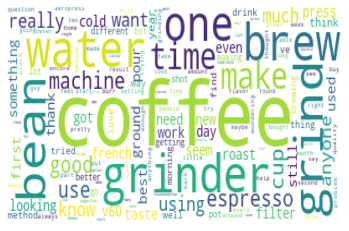

In [127]:
# Create and generate a word cloud image:
wordcloud_coffee_train = WordCloud(collocations = False,
                          background_color = 'white', max_words = 150).generate(coffee)
# Display the generated image
plt.imshow(wordcloud_coffee_train, interpolation = 'bilinear', aspect = 'auto')
plt.axis("off")
## Store to file
plt.savefig("coffee_word_cloud.png", format = "png")
plt.show()

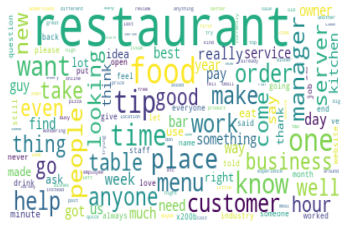

In [128]:
# Create and generate a word cloud image:
wordcloud_restaurant_train = WordCloud(collocations = False,
                          background_color = 'white', max_words = 150).generate(restaurant)
# Display the generated image
plt.imshow(wordcloud_restaurant_train, interpolation = 'bilinear', aspect = 'auto')
plt.axis("off")
## Store to file
plt.savefig("restaurant_word_cloud.png", format = "png")
plt.show()

[*Back to Table of Content^*](#Table-of-Content)

# Baseline Accuracy

<font color=greyblack> We need to calculate baseline accuracy in order to tell if our model is outperforming 

In [129]:
# the null model (predicting the majority class)

training_df['subreddit'].value_counts(normalize=True)

0    0.674276
1    0.325724
Name: subreddit, dtype: float64

<font color=greyblack> The accuracy of predicting a word belongs to coffee subreddit correctly is 67.42% and 32.57% respectively.

[*Back to Table of Content^*](#Table-of-Content)

# Create Train Test Split for Training Dataset

<font color=greyblack> 
Train-Test- Split is perform on Training Data to produce X_train,X_val,y_train,y_val.<br>
Stratify=y is to ensure the train set and validation set has the approximately the same percentagea of samples of each subreddit as the complete set.

In [132]:
X=training_df['clean_training_selftext']
y=training_df['subreddit']

In [133]:
# Create train_test_split for Training dataset
X_train, X_val,y_train, y_val = train_test_split(X,y,stratify=y,random_state=42)                                                           
                                                               

In [134]:
# Check shape
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_val:',y_val.shape)

Shape of X_train: (854,)
Shape of X_val: (285,)
Shape of y_train: (854,)
Shape of y_val: (285,)


[*Back to Table of Content^*](#Table-of-Content)

#  DefineTesting Dataset Feature and Target

In [135]:
# Define Testing Dataset feature and target 
X_test=testing_df['clean_testing_selftext']
y_test=testing_df['subreddit']

In [136]:
# Print Shape
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_test: (285,)
Shape of y_test: (285,)


[*Back to Table of Content^*](#Table-of-Content)

# CountVectorizer

<font color=greyblack> Use Countvectorizer to build a vocabulary of knwon words,<br>
 Tokenization has been taken care in previous Pre-Processing step using function 'text_process'.

In [138]:
# Instantiate a CountVectorizer
cvec=CountVectorizer()

In [139]:
# fit_transform for the model to learn from train data
X_train_cvec = cvec.fit_transform(X_train)

In [140]:
# transform validation data
X_val_cvec = cvec.transform(X_val)

In [141]:
# transform testing data
# X_test_cvec = cvec.transform(X_test)

In [142]:
# get features name for train data
train_features_df=pd.DataFrame(cvec.get_feature_names(),columns=['feature_name'])

In [143]:
# check length of features and len of vocab
print('Length of train features: ',len(train_features_df))
print('Length of train vocab: ',len(cvec.vocabulary_))

Length of train features:  6740
Length of train vocab:  6740


In [144]:
# check train_features_df.head
train_features_df.head(3)

feature_name
0          001
1           01
2          010

In [145]:
# Get a Dictionary with word as key and count as value
word_list = cvec.get_feature_names()
count_list = X_train_cvec.toarray().sum(axis=0)
#print(word_list)
#print (count_list)
word_count_dict=(dict(zip(word_list,count_list)))
word_count_dict
# Creat a df for train_df_vocab: count
train_df_vocab = pd.DataFrame(list(word_count_dict.items()),columns=(['word','count'])).sort_values('word',ascending=True)
train_df_vocab 

word  count
0                     001      1
1                      01      7
2                     010      2
3                     01g      1
4                    01gm      1
5                      02      4
6                    0225      1
7                     02g      1
8                      05      1
9                     05g      2
10                     06      1
11                     07      1
12                     09      1
13                     0r      1
14                     10     41
15                    100     31
16                   1000      3
17                   100g      4
18                 100ish      1
19                    101      4
20                  10310      1
21                    10c      1
22                    10h      1
23                  10ish      1
24                   10oz      1
25                    10s      1
26                   10th      1
27                    10x      1
28                     11      5
29                    110      1
30                   1100      1
31                   110v      3
32                   1147      1
33                    115      2
34                    116      3
35                   11gr      1
36                   11oz      1
37                  11x14      1
38                     12     15
39                    120      7
40                   1200      1
41                   120g      2
42                   120v      1
43                    125      2
44                   12oz      4
45                     13      2
46                    130      1
47                    131      1
48                   135k      1
49                   13gr      1
50                    13k      1
51                     14      8
52                    149      1
53                   1499      1
54                    14g      2
55                   14gr      2
56                     15     17
57                    150      8
58                    155      2
59                    159      1
60                    15g      2
61                  15gal      1
62                    15s      1
63                     16      6
64                    160      1
65                   160g      1
66                 160tax      1
67                    161      1
68                   1647      1
69               1650masl      1
70                    166      1
71                    167      1
72                    168      1
73                   168g      1
74                    16g      1
75                     17      6
76                    179      1
77                    17g      3
78                     18     10
79                    180      2
80                   180g      2
81                    185      3
82                    18c      1
83                    18g      4
84                     19      2
85                    190      2
86                   1900      1
87                 1900ts      4
88                   1901      1
89                    195      1
90                   195f      1
91                    19g      1
92                   19th      1
93                     1a      1
94                    1do      1
95                     1i      1
96                     1k      1
97                    1km      1
98                     1l      7
99                    1st      3
100                    1t      2
101                    1x      1
102                    20     24
103                   200     18
104                  2007      1
105                  200f      1
106                  200g      4
107           200x290x350      1
108                201165      1
109                  2013      2
110                  2015      1
111                  2016      2
112                  2018      3
113                  2019     10
114                   205      3
115                  205f      2
116                  207f      1
117                   208      1
118                   209      1
119                   20g     10
120                   20s   

[*Back to Table of Content^*](#Table-of-Content)

# Model

<font color=greyblack> Using vocabs/ words returned from Counvectorizer, create 2 model: Logistic Regression & Multinomial Naive Bayes model.

## Model: CountVectorizer Logistic Regression

In [147]:
# Instantiate logistic regression model.
lr1 = LogisticRegression()

In [148]:
# Fit model to training data.
lr1.fit(X_train_cvec, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
# Evaluate model on training data, Accuracy Score
lr1.score(X_train_cvec, y_train)
print('lr1.score X_train,y_train: ',(lr1.score(X_train_cvec, y_train)))
# Evaluate model on validation data.
lr1.score(X_val_cvec, y_val)
print('lr1.score X_val,y_val: ',(lr1.score(X_val_cvec, y_val)))

lr1.score X_train,y_train:  0.9988290398126464
lr1.score X_val,y_val:  0.968421052631579


<font color=greyblack> The Training Model has a higher accuracy score than the validation set, thus this training model is overfit. Will use gridsearch later to find best parameter to reduce overfit of training data.

## Model: CountVectorizer Multinomial Naive Bayes

In [151]:
# Instantiate model
nb1 = MultinomialNB()

In [152]:
# Fit model to train
nb1=nb1.fit(X_train_cvec, y_train)

In [153]:
# evaluate our model's performance: Accuracy
# Score model on the train set.
nb1.score(X_train_cvec, y_train)
print('nb1 score X_train,y_train:',(nb1.score(X_train_cvec, y_train)))
# Score our model on the validation set.
nb1.score(X_val_cvec, y_val)
print('nb1 score X_val,y_val:',(nb1.score(X_val_cvec, y_val)))

nb1 score X_train,y_train: 0.990632318501171
nb1 score X_val,y_val: 0.9508771929824561


<font color=greyblack> The Training Model also has a higher accuracy score than the validation set and training model is overfit. Will use gridsearch later to find best parameter to reduce overfit of training data. 

## Pipeline & GridSearch CountVectorizer Logistic Regression

<font color=greyblack> Using Pipeline to automize workflow and GridSearch to find the best parameter for this model. A set of selected hyperparameter is passed in this pipeline & gridsearch:<br>

- max_feature - number of max features
- min_df      - a word must occur in at least this number of documents from the corpus
- max_df      - ignore words that occur in > this % of the documents from the corpus
- ngram_range - n-word phrases   

In [154]:
#Instantiate Pipeline
pipe =Pipeline([
    ('cvec',CountVectorizer(lowercase=False)),
    ('lr1',LogisticRegression())
]) 

In [155]:
# Evaluate how model will perform on unseen data
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9437855201383741

In [157]:
# Fit model
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=False, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr1',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                         

In [158]:
# Training score
pipe.score(X_train, y_train)
print('Pipeline Score X_train,y_train:',(pipe.score(X_train, y_train)))
# Validation score
pipe.score(X_val, y_val)
print('Pipeline Score X_val,y_val:',(pipe.score(X_val, y_val)))

Pipeline Score X_train,y_train: 0.9988290398126464
Pipeline Score X_val,y_val: 0.968421052631579


In [159]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2, 3],    
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1),(1,2),(1,3),(1,4),(1,5)]
    
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print('gs best score:',(gs.best_score_))
print('gs best parameter:', (gs.best_params_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gs best score: 0.9402810304449649
gs best parameter: {'cvec__max_df': 0.9, 'cvec__max_features': 2500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}


In [160]:
# print gs score for X_train,y_train and X_val,y_val
print('gs.score X_train,y_train:',(gs.score(X_train, y_train)))
print('gs.score X_val,y_val:',(gs.score(X_val, y_val)))

gs.score X_train,y_train: 0.9976580796252927
gs.score X_val,y_val: 0.9543859649122807


## Model 1 CountVectorizer Logistic Regression with Best Parameter

<font color=greyblack> Using the best parameter obtained from pipeline & gridsearch, fit and transform the model again to get a more accurate score for train set & validation set.

In [162]:
# using optimum parameter 
cvec=CountVectorizer(lowercase=False, max_df=0.9,max_features=2500,min_df=2,ngram_range=(1,5))

In [163]:
# fit_transform for the model to learn from train data
X_train_cvec= cvec.fit_transform(X_train)

In [164]:
# transform validation data
X_val_cvec= cvec.transform(X_val)

In [165]:
# get features name for train data
train_features_df=pd.DataFrame(cvec.get_feature_names(),columns=['feature_name'])
train_features_df

feature_name
0                            01
1                            10
2                    10 minutes
3                           100
4                          100g
5                           101
6                            11
7                            12
8                         12 oz
9                           120
10                         12oz
11                           14
12                           15
13                          150
14                           16
15                           17
16                           18
17                          18g
18                       1900ts
19                           1l
20                           20
21                          200
22                         200g
23                         2019
24                          20g
25                           21
26                           22
27                         220v
28                           25
29                   25 minutes
30                          250
31                          270
32                          2nd
33                           30
34                   30 seconds
35                          300
36                          330
37                           35
38                          350
39                          3rd
40                     3rd wave
41                           40
42                          400
43                          40g
44                           46
45                           50
46                          500
47                           60
48                          60g
49                           70
50                           80
51                         able
52                     able get
53                    able make
54                   absolutely
55                   acceptable
56                       access
57                 accidentally
58                    according
59                      account
60                     accurate
61                       acidic
62                      acidity
63                     acquired
64                       across
65                       actual
66                     actually
67                          add
68                        added
69                       adding
70                   additional
71                       adjust
72                   adjustment
73              adjustment ring
74                      advance
75                       advice
76                       advise
77                     aergrind
78                    aeropress
79             aeropress french
80       aeropress french press
81                       affect
82                       afford
83                   affordable
84                       afraid
85                    afternoon
86                          ago
87                          air
88                      alcohol
89                        allow
90                       allows
91                       almond
92                  almond milk
93                       almost
94                        along
95                      already
96                         also
97                   also seems
98                    also want
99                  alternative
100                alternatives
101                    although
102                      always
103                  always use
104                     amazing
105              amazing coffee
106                      amazon
107                    amazonde
108                     america
109                    american
110                   americano
111                       among
112                      amount
113                     amounts
114                    annoying
115                     another
116                      answer
117                     anybody
118                     anymore
119                      anyone
120               anyone advice
121                 anyone else
122                 anyone ever
123           anyone experience
124                

In [166]:
# Get a Dictionary with word as key and count as value
word_list = cvec.get_feature_names()
count_list = X_train_cvec.toarray().sum(axis=0)
#print(word_list)
#print (count_list)
word_count_dict=(dict(zip(word_list,count_list)))

# Creat a df for train_df_vocab: count
train_df_vocab = pd.DataFrame(list(word_count_dict.items()),columns=(['word','count'])).sort_values('word',ascending=True)
train_df_vocab 

word  count
0                            01      7
1                            10     41
2                    10 minutes      5
3                           100     31
4                          100g      4
5                           101      4
6                            11      5
7                            12     15
8                         12 oz      4
9                           120      7
10                         12oz      4
11                           14      8
12                           15     17
13                          150      8
14                           16      6
15                           17      6
16                           18     10
17                          18g      4
18                       1900ts      4
19                           1l      7
20                           20     24
21                          200     18
22                         200g      4
23                         2019     10
24                          20g     10
25                           21      4
26                           22      7
27                         220v      4
28                           25     13
29                   25 minutes      4
30                          250     12
31                          270      4
32                          2nd      6
33                           30     30
34                   30 seconds      9
35                          300      6
36                          330      5
37                           35     11
38                          350      4
39                          3rd     10
40                     3rd wave      5
41                           40     16
42                          400     10
43                          40g      4
44                           46      4
45                           50     26
46                          500      6
47                           60      7
48                          60g      4
49                           70      8
50                           80      7
51                         able     45
52                     able get      4
53                    able make      6
54                   absolutely     12
55                   acceptable      5
56                       access      8
57                 accidentally      4
58                    according      4
59                      account      5
60                     accurate      6
61                       acidic      8
62                      acidity     13
63                     acquired      4
64                       across     12
65                       actual      6
66                     actually     28
67                          add     28
68                        added      5
69                       adding      6
70                   additional      9
71                       adjust     11
72                   adjustment     11
73              adjustment ring      4
74                      advance     33
75                       advice     42
76                       advise      4
77                     aergrind     15
78                    aeropress     71
79             aeropress french      5
80       aeropress french press      5
81                       affect      7
82                       afford      4
83                   affordable      7
84                       afraid      4
85                    afternoon      7
86                          ago     42
87                          air     13
88                      alcohol      5
89                        allow      4
90                       allows      4
91                       almond      4
92                  almond milk      4
93                       almost     21
94                        along      9
95                      already     39
96                         also    146
97                   also seems      4
98                    also want      9
99                  alternative      4
100                alternatives      4
101                    although     12
102       

In [167]:
# Top 30 words in train data
TrainData_top_30_word_cvec_lg=train_df_vocab.sort_values('count',ascending=False).head(30)
TrainData_top_30_word_cvec_lg

word  count
414       coffee    909
1239        like    345
2464       would    275
909          get    273
1511         one    243
2395       water    223
961      grinder    199
1803  restaurant    191
933         good    191
2222        time    183
282         brew    183
1166        know    181
219        beans    177
2371        want    174
953        grind    174
2305         use    172
1342        make    171
726     espresso    170
119       anyone    152
1296     looking    149
96          also    146
2319       using    144
1328     machine    138
2176      thanks    132
1752      really    130
1978   something    127
1471         new    123
547        could    122
1448        much    121
943          got    117

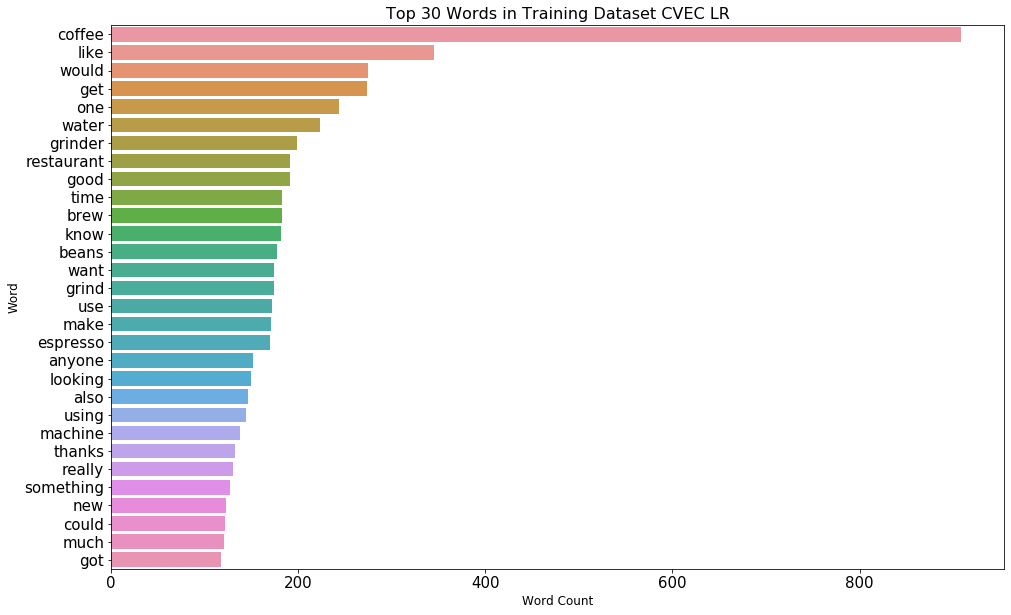

In [168]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x='count', y='word', data=TrainData_top_30_word_cvec_lg)
ax.set_xlabel('Word Count',fontsize=12)
ax.set_ylabel('Word',fontsize=12)
ax.set_title('Top 30 Words in Training Dataset CVEC LR',fontsize=16)
ax.tick_params(labelsize=15);

In [169]:
# Instantiate logistic regression model.
lr1= LogisticRegression()

In [170]:
# Fit model to training data.
lr1.fit(X_train_cvec, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
# Evaluate model on training data, Accuracy Score
lr1.score(X_train_cvec, y_train)
print('lr1 Score on X_train:',(lr1.score(X_train_cvec, y_train)))
# Evaluate model on validation data.
lr1.score(X_val_cvec, y_val)
print('lr1 Score on X_val:',(lr1.score(X_val_cvec, y_val)))

lr1 Score on X_train: 0.9976580796252927
lr1 Score on X_val: 0.9508771929824561


<font color=greyblack> Score for both train set & validation set has dropped compared to the model without tuning on hyperparameter.Overfitting issue has been reduced slightly when train score drop, but at the same time accuracy for validation set dropped too.

# Pipeline & GridSearch CountVectorizer Multinomial Naive Bayes

<font color=greyblack> Using Pipeline to automize workflow and GridSearch to find the best parameter for this model. The same set of Hyperparameter passed in CountVectorizer Logistic Regression is passed in this pipeline & gridsearch. 

In [173]:
#Instantiate Pipeline
pipe =Pipeline([
    ('cvec',CountVectorizer(lowercase=False)),
    ('nb1',MultinomialNB())
]) 

In [174]:
# Evaluate how model will perform on unseen data
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

0.9367926859402026

In [175]:
# Fit model
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=False, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb1',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [176]:
# Training score
pipe.score(X_train, y_train)
print('Pipeline Score X_train,y_train:',(pipe.score(X_train, y_train)))
# Validation score
pipe.score(X_val, y_val)
print('Pipeline Score X_val,y_val:',(pipe.score(X_val, y_val)))

Pipeline Score X_train,y_train: 0.990632318501171
Pipeline Score X_val,y_val: 0.9508771929824561


In [177]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2, 3],    
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1),(1,2),(1,3),(1,4),(1,5)]
    
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print('gs best score:',(gs.best_score_))
print('gs best parameter:', (gs.best_params_))

gs best score: 0.9461358313817331
gs best parameter: {'cvec__max_df': 0.9, 'cvec__max_features': 2500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}


In [178]:
# print gs score for X_train,y_train and X_val,y_val
print('gs.score X_train,y_train:',(gs.score(X_train, y_train)))
print('gs.score X_val,y_val:',(gs.score(X_val, y_val)))

gs.score X_train,y_train: 0.9871194379391101
gs.score X_val,y_val: 0.9508771929824561


## Model 2 CountVectorizer Multinomial Naive Bayes with Best Parameter

<font color=greyblack> Using the best parameter obtained from pipeline & gridsearch, fit and transform the model again to get a more accurate score for train set & validation set.

In [179]:
# using optimum parameter 
cvec=CountVectorizer(lowercase=False, max_df=0.9,max_features=2500,min_df=2,ngram_range=(1,1))

In [180]:
# fit_transform for the model to learn from train data
X_train_cvec= cvec.fit_transform(X_train)

In [181]:
# transform validation data
X_val_cvec= cvec.transform(X_val)

In [182]:
# get features name for train data
train_features_df=pd.DataFrame(cvec.get_feature_names(),columns=['feature_name'])
train_features_df

feature_name
0                  01
1                 010
2                 05g
3                  10
4                 100
5                1000
6                100g
7                 101
8                  11
9                110v
10                115
11                116
12                 12
13                120
14               120g
15                125
16               12oz
17                 13
18                 14
19                14g
20                 15
21                150
22                15g
23                 16
24                 17
25                 18
26                180
27               180g
28                185
29                18g
30                 19
31                190
32             1900ts
33                 1l
34                1st
35                 20
36                200
37               200g
38               2013
39               2016
40               2018
41               2019
42                205
43                20g
44                20s
45                 21
46                 22
47                220
48               220v
49                 25
50                250
51                270
52                2nd
53                 30
54                300
55                330
56                 35
57                350
58                3rd
59                 3x
60                 40
61                400
62                40g
63               40oz
64                 45
65                 46
66                 50
67                500
68                 60
69                60g
70                 65
71                 70
72                 80
73                80g
74               able
75         absolutely
76         acceptable
77          accepting
78             access
79       accidentally
80          according
81            account
82           accurate
83            achieve
84             acidic
85            acidity
86           acquired
87             across
88             actual
89           actually
90                add
91              added
92             adding
93           addition
94         additional
95       additionally
96             adjust
97         adjustable
98          adjusting
99         adjustment
100       adjustments
101             admit
102           advance
103         adventure
104            advice
105            advise
106          aergrind
107              aero
108         aeropress
109         aesthetic
110            affect
111         affiliate
112            afford
113        affordable
114        aficionado
115            afraid
116            africa
117         afternoon
118               age
119               ago
120         agreement
121               aim
122               air
123               aka
124           alcohol
125               all
126         allergies
127             allow
128            allows
129            almond
130            almost
131             alone
132             along
133           already
134              also
135       alternative
136      alternatives
137          although
138         aluminium
139            always
140           amazing
141            amazon
142          amazonde
143           america
144          american
145         americano
146             among
147            amount
148           amounts
149          annoying
150           another
151            answer
152           anybody
153           anymore
154            anyone
155          anything
156            anyway
157           anyways
158          anywhere
159             apart
160               app
161        apparently
162            appear
163           appears
164             apply
165        appreciate
166       appreciated
167          approach
168       approaching
169       appropriate
170            approx
171     approximately
172              apps
173             april
174           arabica
175              area
176             areas
177              aren
178              arms
179             aroma
180            around
181  

In [183]:
# Get a Dictionary with word as key and count as value
word_list = cvec.get_feature_names()
count_list = X_train_cvec.toarray().sum(axis=0)
#print(word_list)
#print (count_list)
word_count_dict=(dict(zip(word_list,count_list)))

# Creat a df for train_df_vocab: count
train_df_vocab = pd.DataFrame(list(word_count_dict.items()),columns=(['word','count'])).sort_values('word',ascending=True)
train_df_vocab 

word  count
0                  01      7
1                 010      2
2                 05g      2
3                  10     41
4                 100     31
5                1000      3
6                100g      4
7                 101      4
8                  11      5
9                110v      3
10                115      2
11                116      3
12                 12     15
13                120      7
14               120g      2
15                125      2
16               12oz      4
17                 13      2
18                 14      8
19                14g      2
20                 15     17
21                150      8
22                15g      2
23                 16      6
24                 17      6
25                 18     10
26                180      2
27               180g      2
28                185      3
29                18g      4
30                 19      2
31                190      2
32             1900ts      4
33                 1l      7
34                1st      3
35                 20     24
36                200     18
37               200g      4
38               2013      2
39               2016      2
40               2018      3
41               2019     10
42                205      3
43                20g     10
44                20s      3
45                 21      4
46                 22      7
47                220      3
48               220v      4
49                 25     13
50                250     12
51                270      4
52                2nd      6
53                 30     30
54                300      6
55                330      5
56                 35     11
57                350      4
58                3rd     10
59                 3x      3
60                 40     16
61                400     10
62                40g      4
63               40oz      2
64                 45      3
65                 46      4
66                 50     26
67                500      6
68                 60      7
69                60g      4
70                 65      3
71                 70      8
72                 80      7
73                80g      3
74               able     45
75         absolutely     12
76         acceptable      5
77          accepting      3
78             access      8
79       accidentally      4
80          according      4
81            account      5
82           accurate      6
83            achieve      3
84             acidic      8
85            acidity     13
86           acquired      4
87             across     12
88             actual      6
89           actually     28
90                add     28
91              added      5
92             adding      6
93           addition      3
94         additional      9
95       additionally      2
96             adjust     11
97         adjustable      2
98          adjusting      3
99         adjustment     11
100       adjustments      3
101             admit      3
102           advance     33
103         adventure      2
104            advice     42
105            advise      4
106          aergrind     15
107              aero      3
108         aeropress     71
109         aesthetic      3
110            affect      7
111         affiliate      2
112            afford      4
113        affordable      7
114        aficionado      2
115            afraid      4
116            africa      2
117         afternoon      7
118               age      3
119               ago     42
120         agreement      3
121               aim      3
122               air     13
123               aka      3
124           alcohol      5
125               all      3
126         allergies      3
127             allow      4
128            allows      4
129            almond      4
130            almost     21
131             alone      3
132             along      9
133           already     39
134              also    146
135       alternative      4
136      alternatives      4
137          al

In [184]:
# Top 30 words in train data
TrainData_top_30_word_cvec_nb=train_df_vocab.sort_values('count',ascending=False).head(30)
TrainData_top_30_word_cvec_nb

word  count
463       coffee    909
1288        like    345
2476       would    275
945          get    273
1519         one    243
2407       water    223
992      grinder    199
968         good    191
1818  restaurant    191
328         brew    183
2241        time    183
1218        know    181
262        beans    177
990        grind    174
2392        want    174
2340         use    172
1351        make    171
721     espresso    170
154       anyone    152
1324     looking    149
134         also    146
2347       using    144
1342     machine    138
2204      thanks    132
1762      really    130
2006   something    127
1472         new    123
534        could    122
1449        much    121
974          got    117

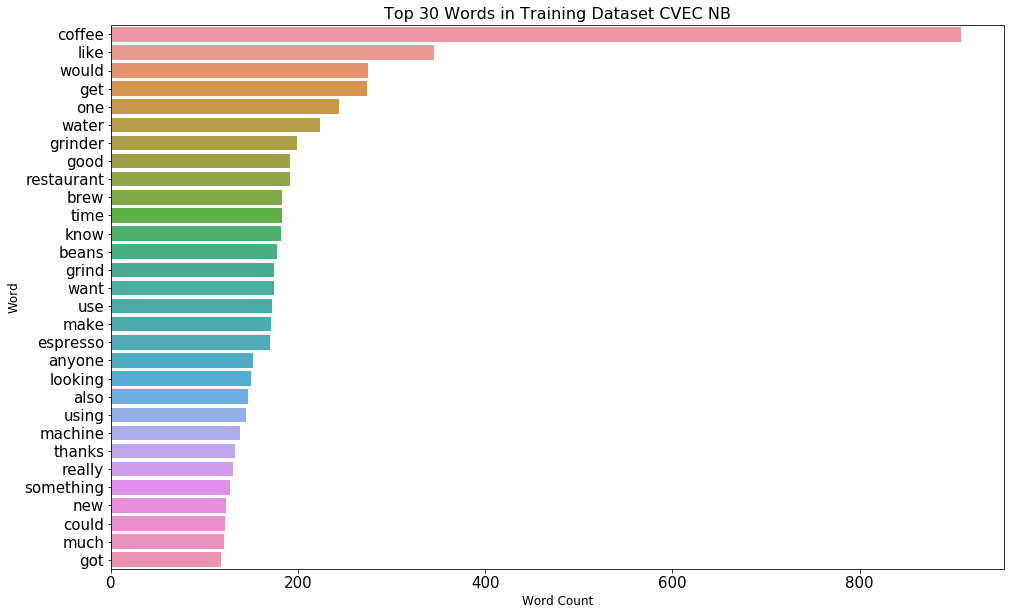

In [185]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x='count', y='word', data=TrainData_top_30_word_cvec_nb)
ax.set_xlabel('Word Count',fontsize=12)
ax.set_ylabel('Word',fontsize=12)
ax.set_title('Top 30 Words in Training Dataset CVEC NB',fontsize=16)
ax.tick_params(labelsize=15);

In [186]:
# Fit model to train
nb1=nb1.fit(X_train_cvec, y_train)

In [187]:
# evaluate our model's performance: Accuracy
# Score model on the train set.
nb1.score(X_train_cvec, y_train)
print('nb1 score X_train,y_train:',(nb1.score(X_train_cvec, y_train)))

# Score our model on the validation set.
nb1.score(X_val_cvec, y_val)
print('nb1 score X_val,y_val:',(nb1.score(X_val_cvec, y_val)))

nb1 score X_train,y_train: 0.9871194379391101
nb1 score X_val,y_val: 0.9508771929824561


<font color=greyblack>
2 models CountVectorizer Logistic Regression and CountVectorizer Multinomial Naive Bayes with their best parameter fit is produced.<br><br>
CountVectorizer Logistic Regression yield train_score  0.9977 and val_score 0.9508 respectively (Different between train & val score is 0.0469) and <br>
CountVectorizer Multinomial Naive Bayes yield train_score 0.9871 and val_score 0.9509 respectively (Different between train & val score is 0.0362)<br><br>
Both models show the training model is slightly overfit with their training score slightlt higher than their val score.<br><br>
CountVectorizer Multinomial Naive Bayes is thus choosen to be the best model to be proceed with testing dataset for prediction.

[*Back to Table of Content^*](#Table-of-Content)

# Using CountVectorizer Multinomial Naive Bayes with Best Parameter to Predict Testing Datasets 

In [188]:
# fit CountVectorizer Naive Bayes using training data again
nb1=nb1.fit(X_train_cvec, y_train)

# transform testing data
X_test_cvec = cvec.transform(X_test)

# predict X_test_cvec
y_predict=nb1.predict(X_test_cvec)

# Score our model on the validation set.
nb1.score(X_test_cvec, y_test)
print('nb1 score X_test,y_test:',(nb1.score(X_test_cvec, y_test)))

nb1 score X_test,y_test: 0.9473684210526315


In [190]:
# Generate a confusion matrix.
confusion_matrix(y_test,y_predict)

# get tn,fp, fn, tp
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()

# print confusion matrix interpretation
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 185
False Positives: 7
False Negatives: 8
True Positives: 85


In [191]:
print('Accuracy Rate: ',(round((tp+tn)*100/(tp+fp+tn+fn),2)))
print('Precision Rate: ',(round((tp)*100/(tp+fp),2)))
print('Misclassification Rate: ',(round((fp+fn)*100/(tp+fp+tn+fn),2)))
print()
print()
print('Sensitivity Rate: ',(round((tp)*100/(tp+fn),2)))  #Among those classified as restuarant, how many it is classified correctly
print('Specificity Rate: ',(round((tn)*100/(tn+fp),2)))  #Among those classified as coffee, how many it is classified correctly


Accuracy Rate:  94.74
Precision Rate:  92.39
Misclassification Rate:  5.26


Sensitivity Rate:  91.4
Specificity Rate:  96.35


In [192]:
print(classification_report(y_test,
                            nb1.predict(X_test_cvec)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       192
           1       0.92      0.91      0.92        93

    accuracy                           0.95       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285



<font color=greyblack> Both Confusion Matrix and Classification Report shows the accuracy of this model in NLP Classification is 95%.<br> 

### Summary on Model & Scores:
    
Baseline Accuracy:
- Subreddit 0:   0.6742
- Subreddit 1:   0.3257


|Model |Train Score |Validation Score| 
|:------:|:------:|:------:|
|CountVectorizer Logistic Regression|0.9988|0.9684|
|CountVectorizer Logistic Regression with Best Parameter|0.9976|0.9508|
|CountVectorizer Multilinear Naive Bayes|0.9906|0.9508|
|CountVectorizer Multilinear Naive Bayes with Best Parameter|0.9871|0.9508|

Using Best Model to do Prediction with Testing Data
- Score on Prediction:  0.9473



[*Back to Table of Content^*](#Table-of-Content)

# Conclusion

<font color=greyblack> The best model chosen in this project is CountVectorizer Multinomial Naive Bayes tuned with hyperparameter withe the final prediction score of 94.73%.<br>
The score for this model are as below when:
    - train set : 0.9871
    - validation set: 0.9508
    - testing/prediction set: 0.9473

In this project, the Key Merics we are looking at Accuracy as any misclassification in the subreddit post will result in an ambiguos state as to which group of subject this word belongs to when creating content. <br><br>

Limitation:
The dataset used in this project is unproportional with more data coming from subreddit 0 and lesser from subreddit 1.<br>
Can explore using the same picked best model on a more balanced data set to check on the train, validation and prediction score.<br>

Recommendation:
To use other classifier model to see how this unproportional dataset will score.